## Table of content 

1. SQURPHARMA 
2. Tachnical indicator 
3. R1 , R2 
4. COR1, COR2 
5. Gold_price_close 
6. Gold rate bd 
7. BD reserve 
8. SMA, BBANDS_UPPER ,BBANDS_MIDDLE
9. Year height and low 


## Basic information 
this eda contain 3 dataset 
1. SQURPHARMA that contain the open heigh low close  of the stock 
2. data contain the techincal indicator of the stock 
3. sqph_data that combine the 2 dataset also with other colums those are created by feature engineering 

## main dataset is sqph_dataset will be provided in the notebook or in the readme file 


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import wandb

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [8]:
data_path =r'C:\Users\Amzad\Desktop\sqph_stock_prediction\artifacts\data.csv'
test_data_path =r'C:\Users\Amzad\Desktop\sqph_stock_prediction\artifacts\test.csv'
train_data_path =r'C:\Users\Amzad\Desktop\sqph_stock_prediction\artifacts\train.csv' 
# create wandb  init 
#wandb.init(project='stock_prediction', entity='amzad', name='stock_prediction_eda', job_type='upload')

# create an artifact for the dataset as dataframes 


# load the data
data = pd.read_csv(data_path)
# create table for the data with wandb including the dataframes
table = wandb.Table(columns=list(data.columns), data=data.values.tolist())

test_data = pd.read_csv(test_data_path)
train_data = pd.read_csv(train_data_path)


run = wandb.init(project='course-project', entity='amzad', job_type='upload')

artifact = wandb.Artifact('course-project',type='dataset')
artifact.add_file(data_path)
run.log_artifact(artifact)



wandb.finish()


## SQURPHARMA.csv

In [2]:
#read the data from the csv file    
read_stock_data = pd.read_csv(
    r'C:\Users\Amzad\Desktop\stock_prediction\components\Stock Price Dataset - SQURPHARMA.csv')

# convert the date column to datetime format year/month/day

read_stock_data['Date'] = pd.to_datetime(read_stock_data['Date'], format='%Y/%m/%d')
#take 5 columns from the dataset 
stock_= read_stock_data[['Date', 'Open', 'High', 'Low', 'Close']]

#take the values from date 1-1-2012
stock_=stock_[stock_['Date']>'2012-01-01']
#set the date column as index
stock_data=stock_.copy()
stock_data.set_index('Date', inplace=True)



In [3]:
stock_data.head()

Open   High    Low  Close
Date                                  
2022-11-07  209.8  210.0  209.8  209.8
2022-11-06  212.6  212.6  209.8  209.8
2022-11-03  210.7  212.0  210.4  211.5
2022-11-02  209.8  213.8  209.8  210.8
2022-11-01  209.8  209.8  209.8  209.8

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

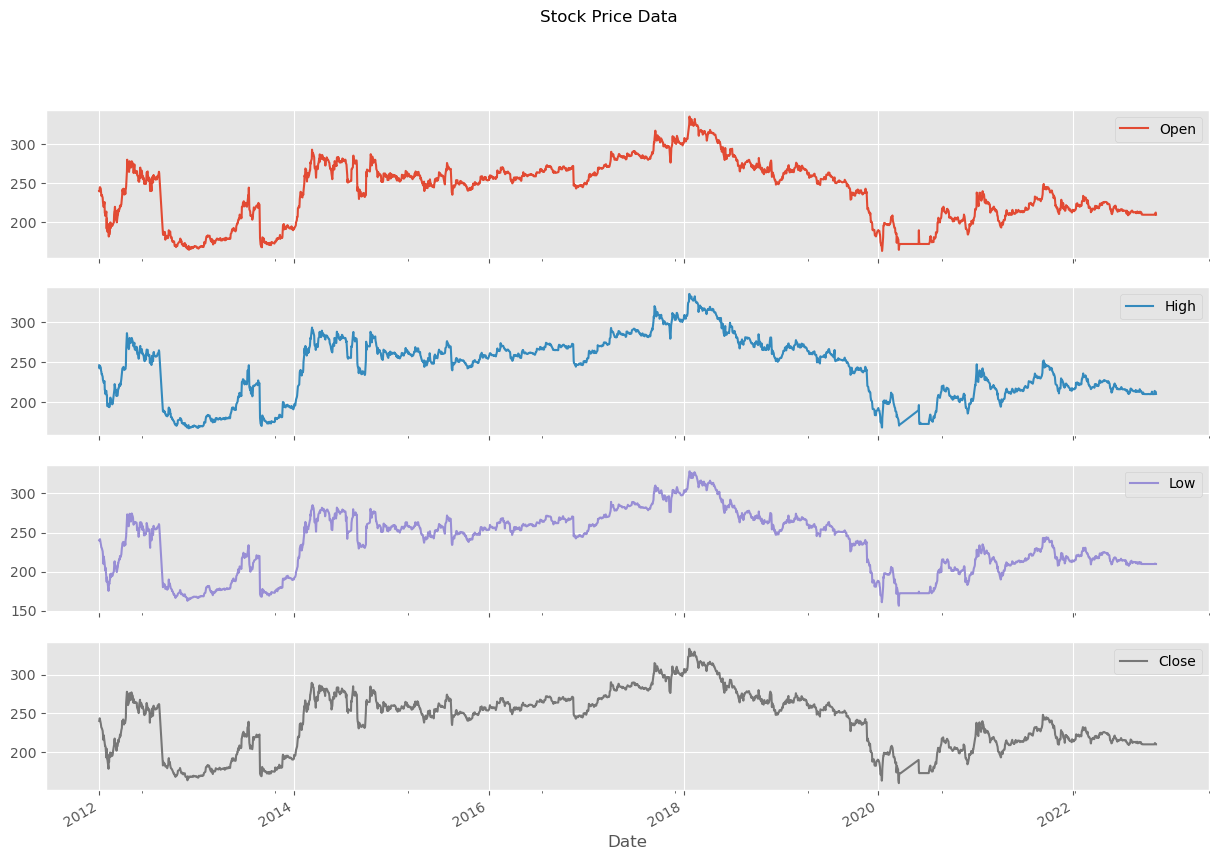

In [4]:
#plot the data 
#subplots = True, means that we want to plot the data in different subplots 
stock_data.plot(subplots=True, figsize=(15, 10), title='Stock Price Data', grid=True, legend=True)


b:\anaconda\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


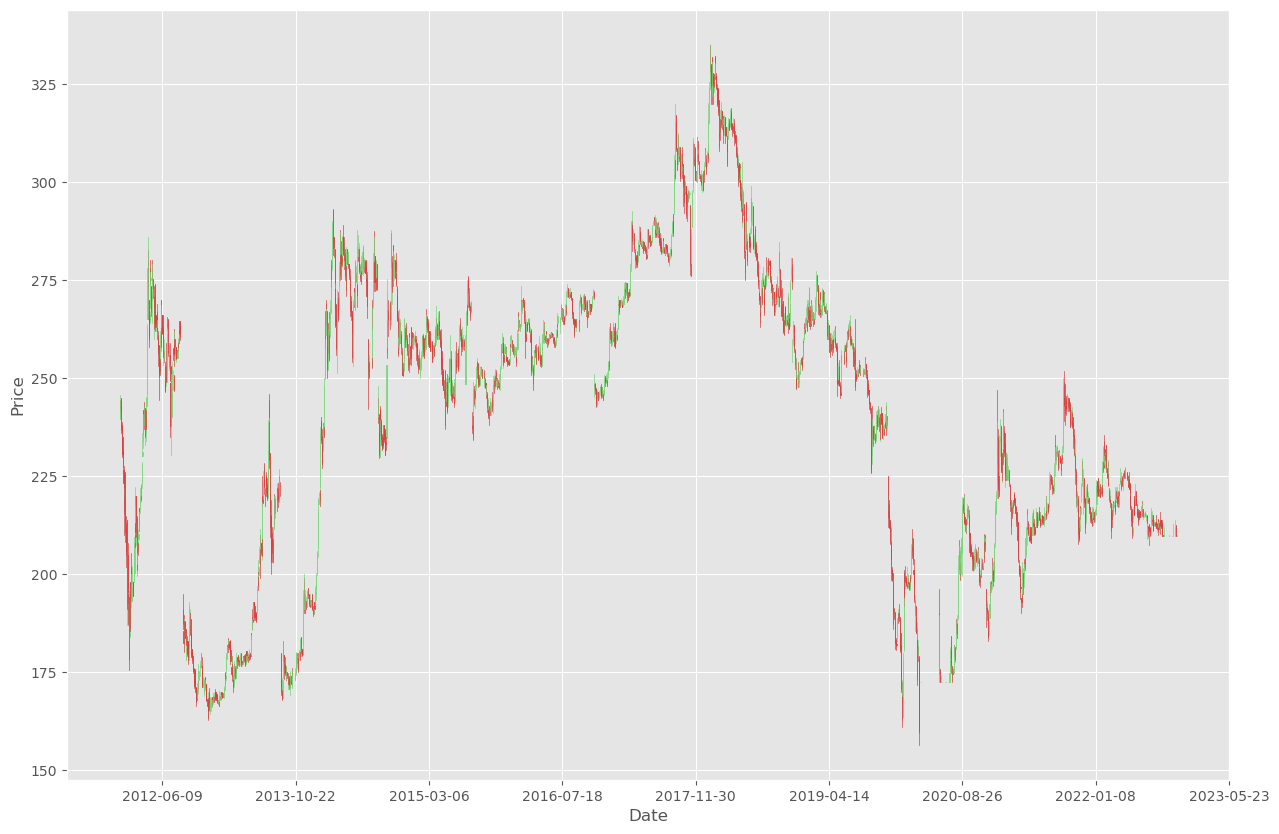

In [5]:
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
from datetime import date
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

df_cp = stock_.copy()
df_cp.Date = date2num(pd.to_datetime(stock_.Date).dt.to_pydatetime())
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick_ohlc(ax1,df_cp.values, width=0.4, colorup='#77d879', colordown='#db3f3f',alpha=1)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [7]:
#max and min close price 
print('Max Close Price: ', stock_data['Close'].max())
#date of max close price
print('Date of Max Close Price: ', stock_data['Close'].idxmax())
print('Min Close Price: ', stock_data['Close'].min())
#date of min close price
print('Date of Min Close Price: ', stock_data['Close'].idxmin())
#max and min open price 
print('Max Open Price: ', stock_data['Open'].max())
print('Date of Max Open Price: ', stock_data['Open'].idxmax())
print('Min Open Price: ', stock_data['Open'].min())
print('Date of Min Open Price: ', stock_data['Open'].idxmin())

#max and min high price 
print('Max High Price: ', stock_data['High'].max())
print('Date of Max High Price: ', stock_data['High'].idxmax())
print('Min High Price: ', stock_data['High'].min())
print('Date of Min High Price: ', stock_data['High'].idxmin())

#max and min low price
print('Max Low Price: ', stock_data['Low'].max())
print('Date of Max Low Price: ', stock_data['Low'].idxmax())
print('Min Low Price: ', stock_data['Low'].min())
print('Date of Min Low Price: ', stock_data['Low'].idxmin())

Max Close Price:  333.8
Date of Max Close Price:  2018-01-22 00:00:00
Min Close Price:  159.5
Date of Min Close Price:  2020-03-18 00:00:00
Max Open Price:  335.0
Date of Max Open Price:  2018-01-23 00:00:00
Min Open Price:  163.6
Date of Min Open Price:  2020-01-15 00:00:00
Max High Price:  335.0
Date of Max High Price:  2018-01-23 00:00:00
Min High Price:  167.0
Date of Min High Price:  2012-12-03 00:00:00
Max Low Price:  328.2
Date of Max Low Price:  2018-01-24 00:00:00
Min Low Price:  156.5
Date of Min Low Price:  2020-03-18 00:00:00


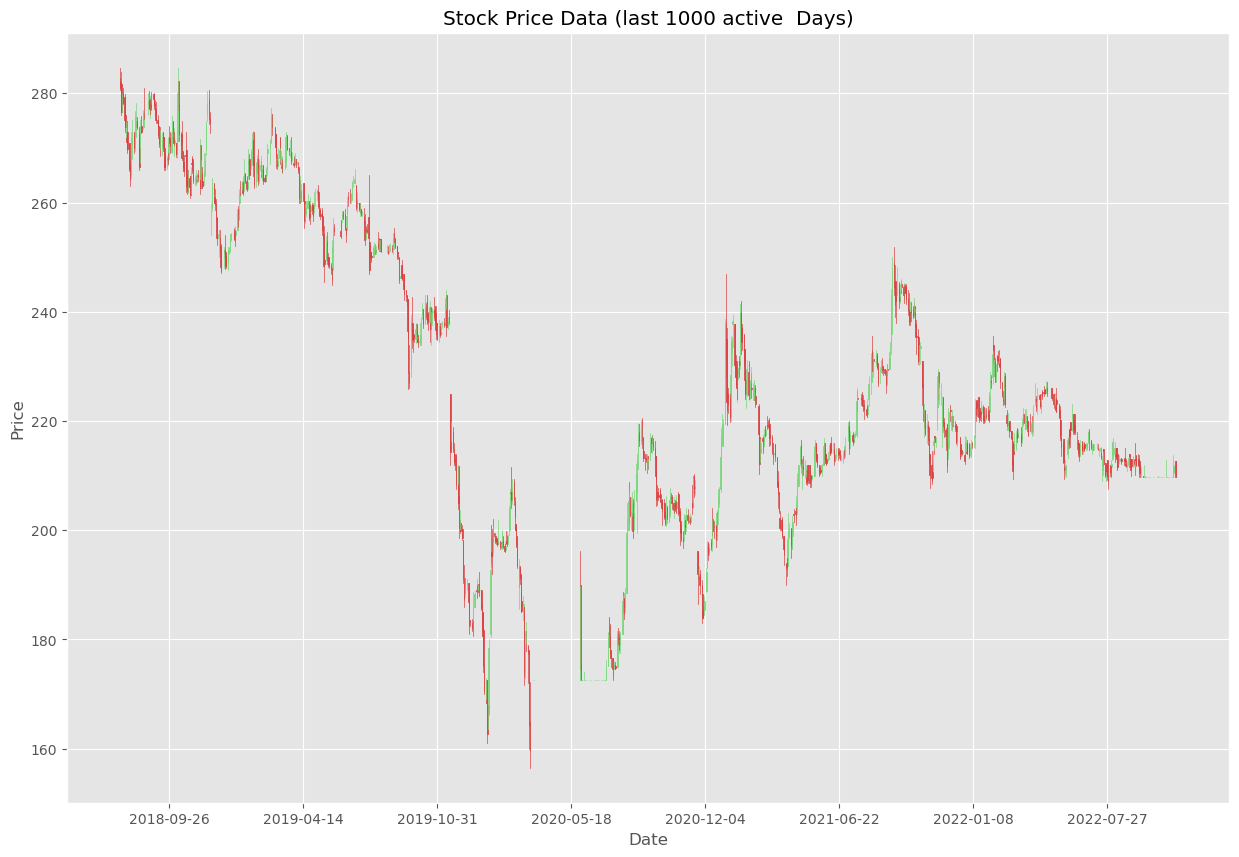

In [8]:
ax1 = plt.subplot2grid((1,1), (0,0))
ret=candlestick_ohlc(ax1,df_cp.iloc[:1000,:].values, width=0.8, colorup='#77d879', colordown='#db3f3f',alpha=1)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
plt.title('Stock Price Data (last 1000 active  Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [13]:
#sav figure 
plt.savefig(r'C:\Users\Amzad\Desktop\stock-price-prediction(main)\fig/Stock Price Data (last 1000 active  Days).png')

<Figure size 1500x1000 with 0 Axes>

In [8]:
#max price in last 1000 days
print('Max Close Price: ', stock_data['Close'].iloc[:1000].max())
#date of max close price
print('Date of Max Close Price: ', stock_data['Close'].iloc[:1000].idxmax())
#min price in last 1000 days
print('Min Close Price: ', stock_data['Close'].iloc[:1000].min())
#date of min close price
print('Date of Min Close Price: ', stock_data['Close'].iloc[:1000].idxmin())

Max Close Price:  281.7
Date of Max Close Price:  2018-07-15 00:00:00
Min Close Price:  159.5
Date of Min Close Price:  2020-03-18 00:00:00


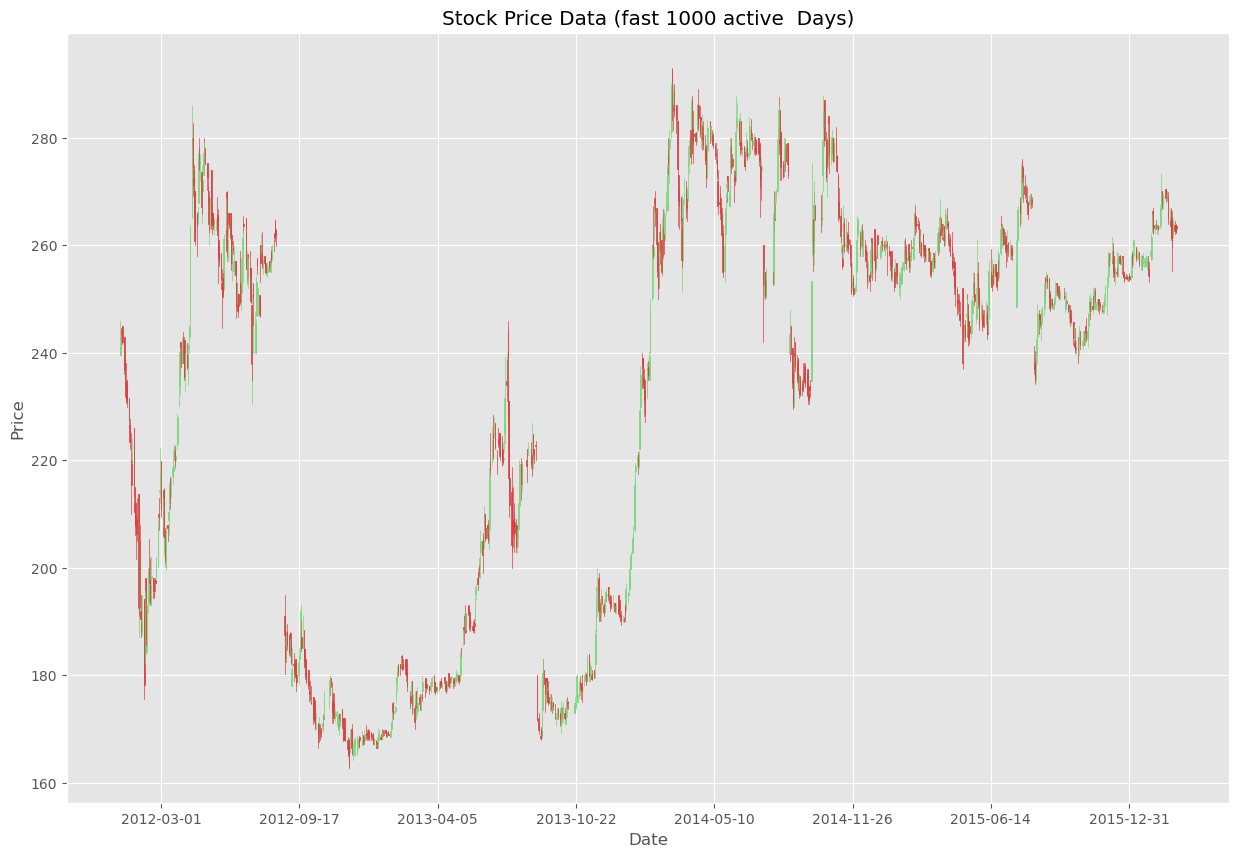

In [9]:
ax1 = plt.subplot2grid((1,1), (0,0))
ret=candlestick_ohlc(ax1,df_cp.iloc[-1000:,:].values, width=1, colorup='#77d879', colordown='#db3f3f',alpha=1,)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
plt.title('Stock Price Data (fast 1000 active  Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [4]:
print('Max Close Price: ', stock_data['Close'].iloc[-1000:].max())
#date of max close price
print('Date of Max Close Price: ', stock_data['Close'].iloc[-1000:].idxmax())
#min price in last 1000 days
print('Min Close Price: ', stock_data['Close'].iloc[-1000:].min())
#date of min close price
print('Date of Min Close Price: ', stock_data['Close'].iloc[-1000:].idxmin())

Max Close Price:  289.6
Date of Max Close Price:  2014-03-09 00:00:00
Min Close Price:  163.2
Date of Min Close Price:  2012-11-28 00:00:00


In [12]:
#save figure to fig folder 
plt.savefig(r'C:\Users\Amzad\Desktop\stock-price-prediction(main)\fig/Stock_Price_Data_(fast 1000 active  Days).png')

<Figure size 1500x1000 with 0 Axes>

<AxesSubplot:>

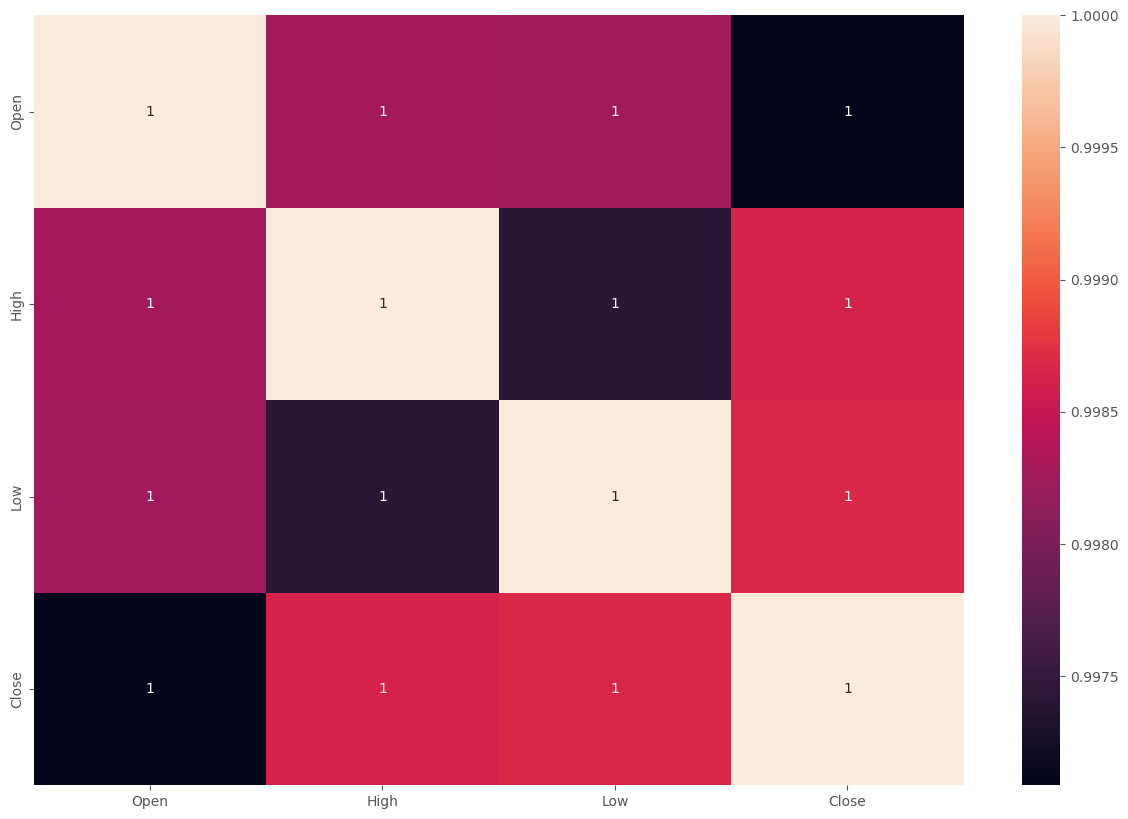

In [10]:
#corr plot with close price     
corr = stock_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)


In [14]:
#save figure to fig folder 
plt.savefig(r'C:\Users\Amzad\Desktop\stock-price-prediction(main)\fig/Correlation_Plot_1.png')

<Figure size 1500x1000 with 0 Axes>

## finding 

1. every column is strongly correlated with each other 

In [11]:
#describe the data 
stock_data.describe()


Open         High          Low        Close
count  2570.000000  2570.000000  2570.000000  2570.000000
mean    240.814241   242.566226   238.760739   240.485175
std      37.841248    37.928167    37.688605    37.810284
min     163.600000   167.000000   156.500000   159.500000
25%     212.900000   214.000000   211.000000   212.200000
50%     249.550000   251.000000   247.650000   249.150000
75%     267.300000   269.000000   265.300000   267.100000
max     335.000000   335.000000   328.200000   333.800000

## Tachnical indicator 


In [12]:
#read the Tachinal indicater 

data = pd.read_csv(r'C:\Users\Amzad\Desktop\stock-price-prediction(main)\notebook\data\data.csv')
# columns 10 to 40 are the technical indicators
data = data.iloc[:, 10:39]
data.head()


CDLTHRUSTING  CDLTRISTAR  CDLSHORTLINE  CDLPIERCING  CDLRICKSHAWMAN  \
0             0           0             0            0               0   
1             0           0             0            0               0   
2             0           0             0            0               0   
3             0           0             0          100               0   
4             0           0             0            0               0   

   CDLSPINNINGTOP  CDLHOMINGPIGEON  CDLINVERTEDHAMMER  CDLLONGLEGGEDDOJI  \
0               0                0                  0                  0   
1               0              100                  0                  0   
2               0                0                  0                  0   
3               0                0                  0                  0   
4               0                0                  0                  0   

   CDLLONGLINE  ...  CDLHIKKAKE  CDLBELTHOLD  CDLCLOSINGMARUBOZU  \
0         -100  ...           0         -100                   0   
1            0  ...           0            0                   0   
2         -100  ...           0         -100                   0   
3            0  ...           0            0                   0   
4            0  ...           0            0                   0   

   CDLCOUNTERATTACK  CDLDOJI  CDLDOJISTAR  CDLDRAGONFLYDOJI  CDLENGULFING  \
0                 0        0            0                 0             0   
1                 0        0            0                 0             0   
2                 0        0            0                 0             0   
3                 0        0            0                 0             0   
4                 0        0            0                 0             0   

   CDL3INSIDE  CDLSHOOTINGSTAR  
0           0                0  
1           0                0  
2           0                0  
3           0                0  
4           0                0  

[5 rows x 29 columns]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   CDLTHRUSTING         2432 non-null   int64
 1   CDLTRISTAR           2432 non-null   int64
 2   CDLSHORTLINE         2432 non-null   int64
 3   CDLPIERCING          2432 non-null   int64
 4   CDLRICKSHAWMAN       2432 non-null   int64
 5   CDLSPINNINGTOP       2432 non-null   int64
 6   CDLHOMINGPIGEON      2432 non-null   int64
 7   CDLINVERTEDHAMMER    2432 non-null   int64
 8   CDLLONGLEGGEDDOJI    2432 non-null   int64
 9   CDLLONGLINE          2432 non-null   int64
 10  CDLMARUBOZU          2432 non-null   int64
 11  CDLMATCHINGLOW       2432 non-null   int64
 12  CDLGAPSIDESIDEWHITE  2432 non-null   int64
 13  CDLGRAVESTONEDOJI    2432 non-null   int64
 14  CDLHAMMER            2432 non-null   int64
 15  CDLHANGINGMAN        2432 non-null   int64
 16  CDLHARAMI            243

#### no missing value 

In [14]:
# find the persentage of 0 values in each column 
data=data.copy()
data.isin([0]).sum()/len(data)
#find columns with more than 99% 0 values
data.isin([0]).sum()/len(data) > 0.99
#drop the columns with more than 99% 0 values
data = data.drop(data.columns[data.isin([0]).sum()/len(data) > 0.99], axis=1)
data.head()


CDLSHORTLINE  CDLRICKSHAWMAN  CDLSPINNINGTOP  CDLHOMINGPIGEON  \
0             0               0               0                0   
1             0               0               0              100   
2             0               0               0                0   
3             0               0               0                0   
4             0               0               0                0   

   CDLINVERTEDHAMMER  CDLLONGLEGGEDDOJI  CDLLONGLINE  CDLMARUBOZU  \
0                  0                  0         -100            0   
1                  0                  0            0            0   
2                  0                  0         -100            0   
3                  0                  0            0            0   
4                  0                  0            0            0   

   CDLMATCHINGLOW  CDLGRAVESTONEDOJI  ...  CDLHARAMI  CDLHARAMICROSS  \
0             100                  0  ...          0               0   
1               0                  0  ...        100               0   
2               0                  0  ...          0               0   
3               0                  0  ...          0               0   
4               0                  0  ...          0               0   

   CDLHIGHWAVE  CDLHIKKAKE  CDLBELTHOLD  CDLCLOSINGMARUBOZU  CDLDOJI  \
0            0           0         -100                   0        0   
1            0           0            0                   0        0   
2            0           0         -100                   0        0   
3            0           0            0                   0        0   
4            0           0            0                   0        0   

   CDLDRAGONFLYDOJI  CDLENGULFING  CDLSHOOTINGSTAR  
0                 0             0                0  
1                 0             0                0  
2                 0             0                0  
3                 0             0                0  
4                 0             0                0  

[5 rows x 22 columns]

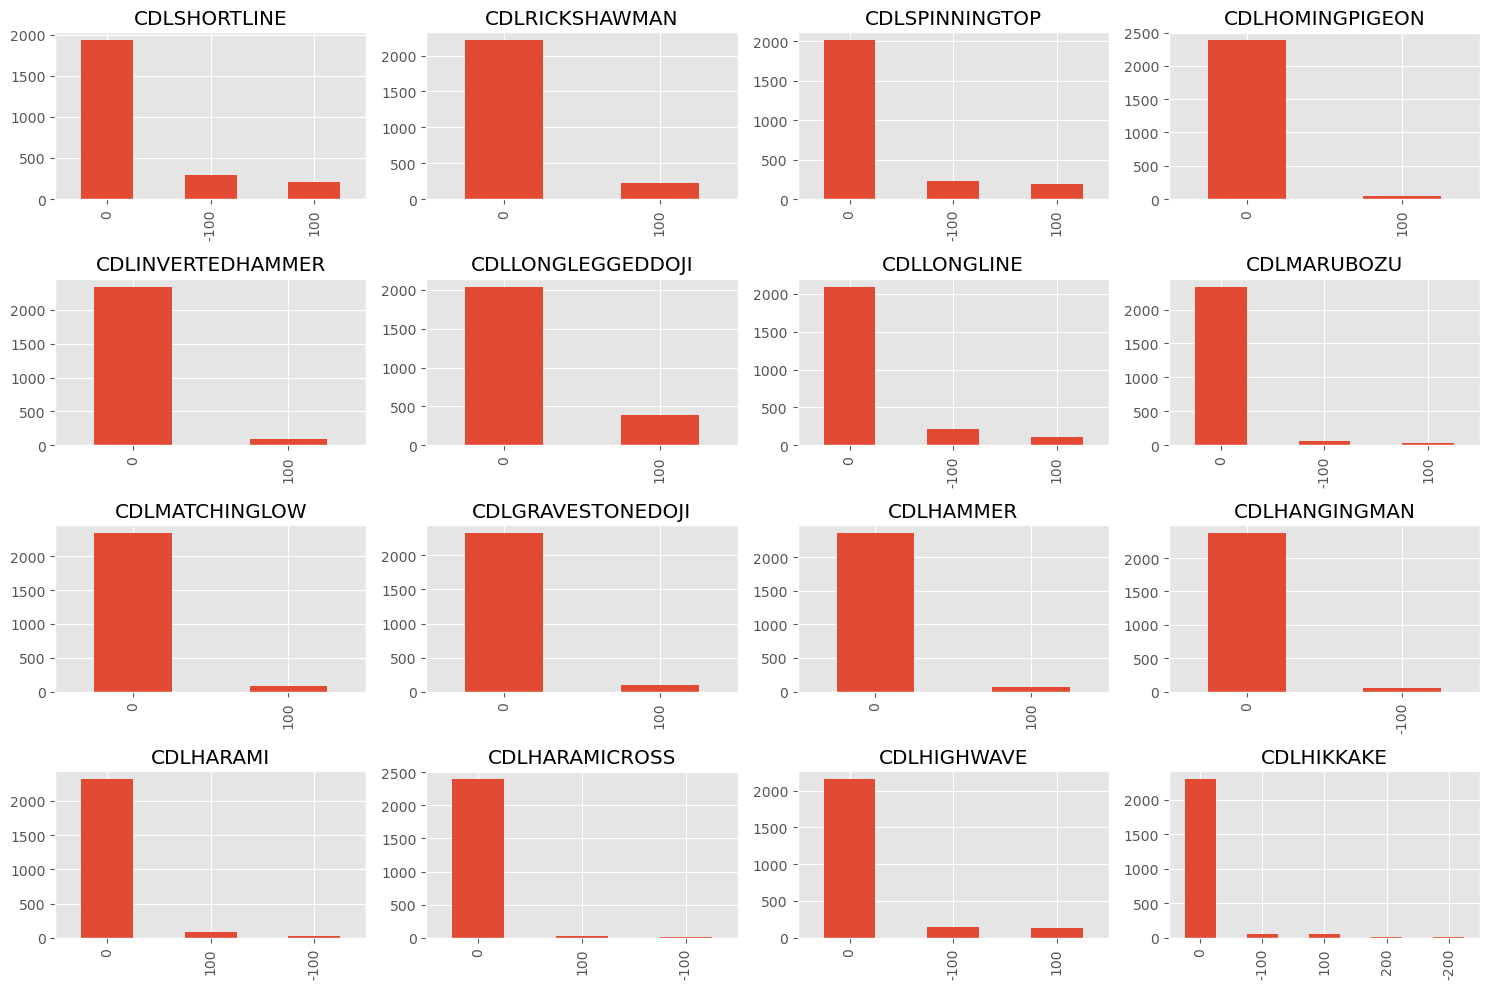

In [15]:
# value counts of each column and sub plot the data 
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
for i, ax in enumerate(axes.flatten()):
    data.iloc[:, i].value_counts().plot(kind='bar', ax=ax, title=data.columns[i])
plt.tight_layout()
plt.show()




In [15]:
#save figure to fig folder
plt.savefig(r'C:\Users\Amzad\Desktop\stock-price-prediction(main)\fig/Technical_Indicators_value_count.png')

<Figure size 1500x1000 with 0 Axes>

In [16]:
#find the corr with close price 
corr = data.corrwith(stock_data['Close'])
corr = corr.sort_values(ascending=False)
corr

CDLSHORTLINE         NaN
CDLRICKSHAWMAN       NaN
CDLSPINNINGTOP       NaN
CDLHOMINGPIGEON      NaN
CDLINVERTEDHAMMER    NaN
CDLLONGLEGGEDDOJI    NaN
CDLLONGLINE          NaN
CDLMARUBOZU          NaN
CDLMATCHINGLOW       NaN
CDLGRAVESTONEDOJI    NaN
CDLHAMMER            NaN
CDLHANGINGMAN        NaN
CDLHARAMI            NaN
CDLHARAMICROSS       NaN
CDLHIGHWAVE          NaN
CDLHIKKAKE           NaN
CDLBELTHOLD          NaN
CDLCLOSINGMARUBOZU   NaN
CDLDOJI              NaN
CDLDRAGONFLYDOJI     NaN
CDLENGULFING         NaN
CDLSHOOTINGSTAR      NaN
dtype: float64

<AxesSubplot:>

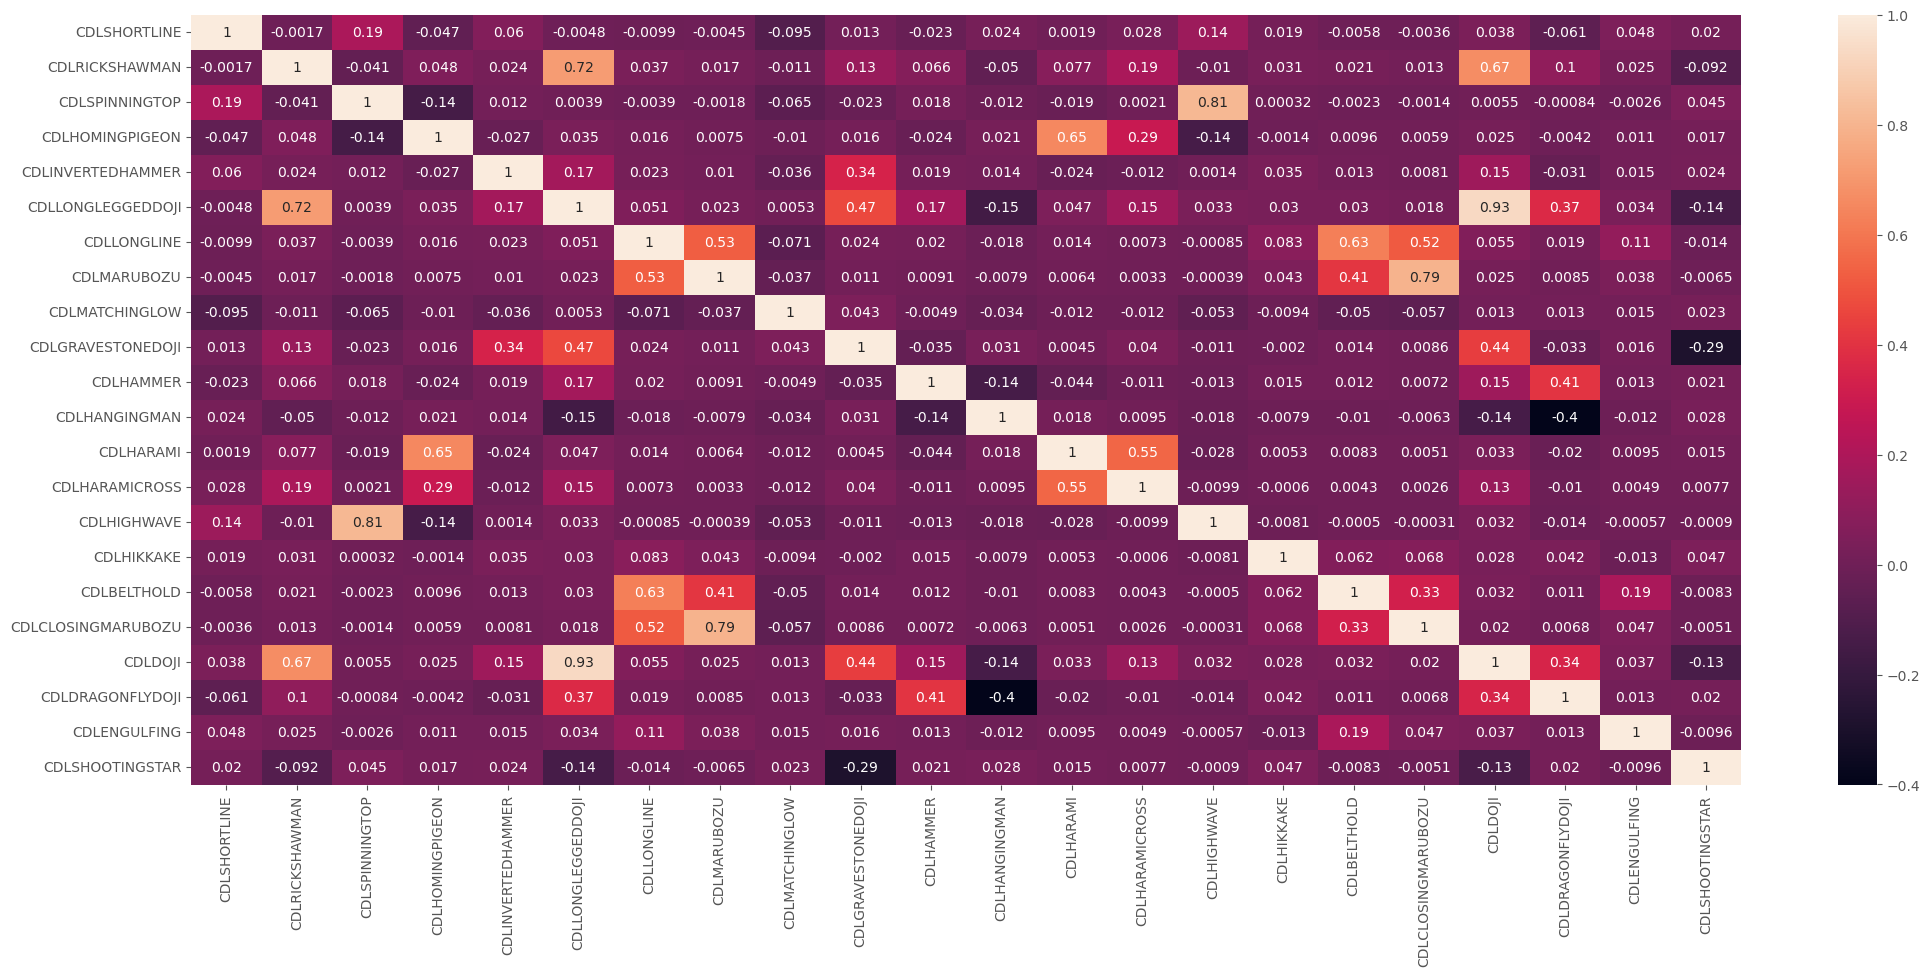

In [17]:
#corr amooung each other  with close price 


plt.rcParams['figure.figsize'] = (25, 10)

corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)



## there is some corrlationn bwtween  so this indicator is not totally worthless 

In [18]:
#top 5 corr values in crr matrix
corr = data.corr()
corr = corr.unstack().sort_values(ascending=False).drop_duplicates()
corr[corr.index.get_level_values(0) != corr.index.get_level_values(1)].head(10)


CDLDOJI             CDLLONGLEGGEDDOJI    0.929871
CDLHIGHWAVE         CDLSPINNINGTOP       0.810878
CDLCLOSINGMARUBOZU  CDLMARUBOZU          0.794990
CDLLONGLEGGEDDOJI   CDLRICKSHAWMAN       0.719825
CDLRICKSHAWMAN      CDLDOJI              0.669344
CDLHARAMI           CDLHOMINGPIGEON      0.651787
CDLLONGLINE         CDLBELTHOLD          0.627729
CDLHARAMICROSS      CDLHARAMI            0.550997
CDLMARUBOZU         CDLLONGLINE          0.525846
CDLCLOSINGMARUBOZU  CDLLONGLINE          0.518084
dtype: float64

### there are no corr with target variable top5 (total 10 indicator) are recommended to use 

## Breakout and consolidation


In [17]:
#  make new df with colume 1to 10 and 40 to 89 
data_other = pd.read_csv(r'C:\Users\Amzad\Desktop\stock-price-prediction(main)\notebook\data\data.csv')
data_other_f10 = data_other.iloc[:, 1:10]
data_other_f40 = data_other.iloc[:, 40:89]
data_other = pd.concat([data_other_f10, data_other_f40], axis=1) 
data_other.shape
data_other.head()
data_copy=data_other.copy()


0    2359
1      73
Name: Breakout, dtype: int64


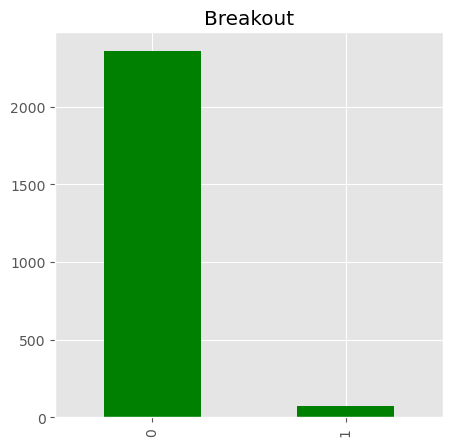

<Figure size 1500x1000 with 0 Axes>

In [18]:
# number of of breakouts in berakout column 
print(data_other['Breakout'].value_counts())
#sub plot the breakout column and Consolidate value counts 

data_other['Breakout'].value_counts().plot(kind='bar', title='Breakout',figsize=(5, 5),color='green')
plt.show()
plt.savefig(r'C:\Users\Amzad\Desktop\stock-price-prediction(main)\fig/Breakout.png')

0    2288
1     144
Name: Consolidate, dtype: int64


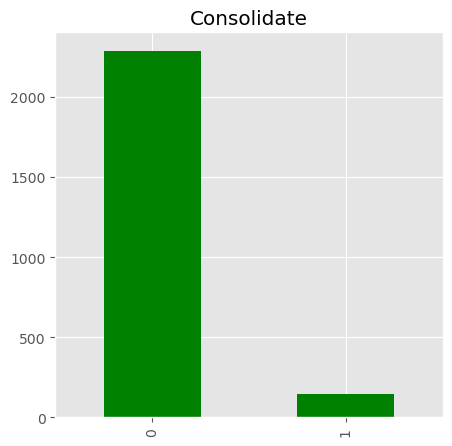

<Figure size 1500x1000 with 0 Axes>

In [19]:
# number of of breakouts in Consolidate column
print(data_other['Consolidate'].value_counts())
data_other['Consolidate'].value_counts().plot(kind='bar', title='Consolidate',figsize=(5, 5),color='green')
plt.show()
plt.savefig(r'C:\Users\Amzad\Desktop\stock-price-prediction(main)\fig/Consolidate.png')

## SMA, BBANDS_UPPER ,BBANDS_MIDDLE

#### SMA	, BBANDS_UPPER ,BBANDS_MIDDLE ,BBANDS_LOWER	STOCH_SLOWK,STOCH_SLOWD,SMA_10,EMA_10,RSI,	SMA_20,	EMA_20,	SMA_50,	EMA_50,	SMA_100,	EMA_100

In [20]:
# make new datafram with SMA, BBANDS_UPPER ,BBANDS_MIDDLE ,BBANDS_LOWER	STOCH_SLOWK,STOCH_SLOWD,SMA_10,EMA_10,RSI,	SMA_20,	EMA_20,	SMA_50,	EMA_50,	SMA_100,EMA_100 column 
data_other = data_other[['SMA', 'BBANDS_UPPER', 'BBANDS_MIDDLE', 'BBANDS_LOWER', 'STOCH_SLOWK', 'STOCH_SLOWD', 'SMA_10', 'EMA_10', 'RSI', 'SMA_20', 'EMA_20', 'SMA_50', 'EMA_50', 'SMA_100', 'EMA_100']]
data_other.head()

SMA  BBANDS_UPPER  BBANDS_MIDDLE  BBANDS_LOWER  STOCH_SLOWK  \
0  2889.46   3046.131072      2879.3750   2712.618928    87.324786   
1  2898.30   3070.773050      2888.5500   2706.326950    88.520730   
2  2910.30   3096.555406      2898.9250   2701.294594    90.298507   
3  2919.10   3124.269793      2909.2375   2694.205207    72.412329   
4  2929.86   3153.510826      2925.0250   2696.539174    70.598670   

   STOCH_SLOWD  SMA_10      EMA_10        RSI   SMA_20      EMA_20   SMA_50  \
0    80.014288  237.05  235.529438  65.477933  224.805  227.299387  210.608   
1    84.883000  235.89  234.780425  67.154338  223.065  226.078270  210.074   
2    88.714674  234.20  233.576075  68.278115  220.830  224.591772  209.560   
3    83.743855  231.63  231.904091  71.358199  218.300  222.854064  209.108   
4    77.769835  229.43  229.305001  70.518438  215.605  220.670281  208.614   

       EMA_50  SMA_100  EMA_100  
0  221.613237      NaN      NaN  
1  220.907655      NaN      NaN  
2  220.120212      NaN      NaN  
3  219.263894      NaN      NaN  
4  218.270584      NaN      NaN

In [21]:
data_other.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SMA            2432 non-null   float64
 1   BBANDS_UPPER   2432 non-null   float64
 2   BBANDS_MIDDLE  2432 non-null   float64
 3   BBANDS_LOWER   2432 non-null   float64
 4   STOCH_SLOWK    2432 non-null   float64
 5   STOCH_SLOWD    2432 non-null   float64
 6   SMA_10         2206 non-null   float64
 7   EMA_10         2206 non-null   float64
 8   RSI            2086 non-null   float64
 9   SMA_20         1966 non-null   float64
 10  EMA_20         1966 non-null   float64
 11  SMA_50         1246 non-null   float64
 12  EMA_50         1246 non-null   float64
 13  SMA_100        24 non-null     float64
 14  EMA_100        24 non-null     float64
dtypes: float64(15)
memory usage: 285.1 KB


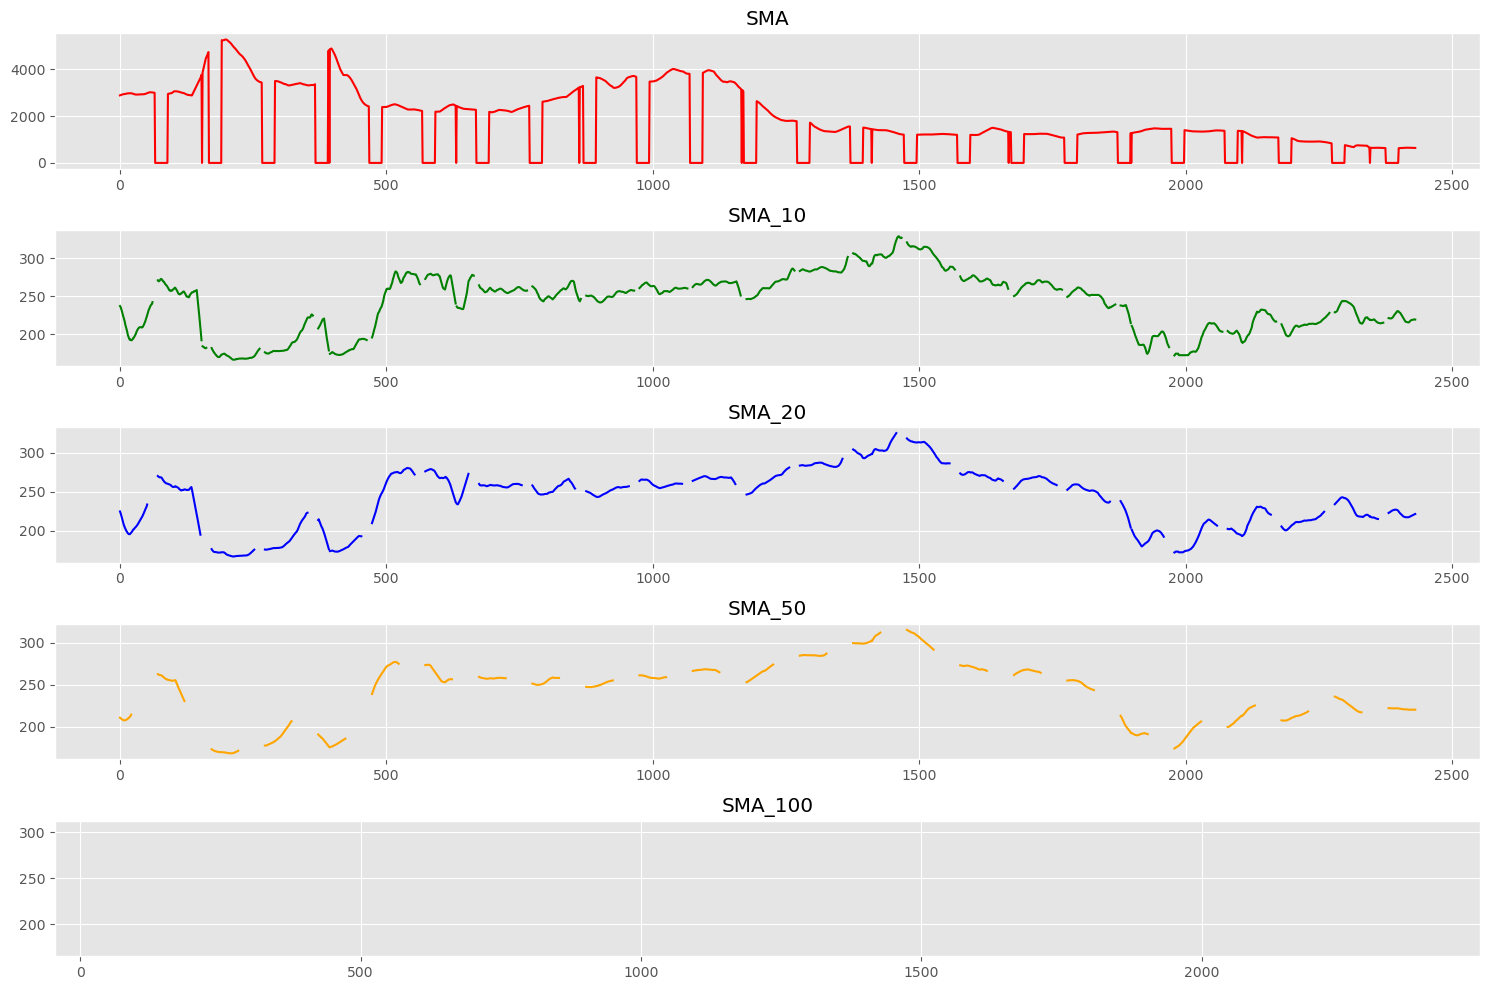

<Figure size 1500x1000 with 0 Axes>

In [52]:
#Plot SME, SME_10, SME_20, SME_50, SME_100 Column
sme_columns = ['SMA', 'SMA_10', 'SMA_20', 'SMA_50', 'SMA_100']
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 10))
colors = ['red', 'green', 'blue', 'orange', 'black']

for i, ax in enumerate(axes.flatten()):
    data_other[sme_columns[i]].plot(ax=ax, title=sme_columns[i],color=colors[i])
plt.tight_layout()
plt.show()
plt.savefig(r'C:\Users\Amzad\Desktop\stock-price-prediction(main)\fig/SME_SME_10_SME_20_SME_50_SME_100.png')

In [25]:
data_ = stock_data.copy()
corr = data_other['SMA_10'].corr(data_copy['Close'])
print('Correlation between SMA_10 and Close: ', corr)

Correlation between SMA_10 and Close:  0.9861095320396079


### SMA_10 ,SMA_20 ,SMA_50 shows the same pattern as amoung each other  
## so taking only one of them is(SMA_10) enough

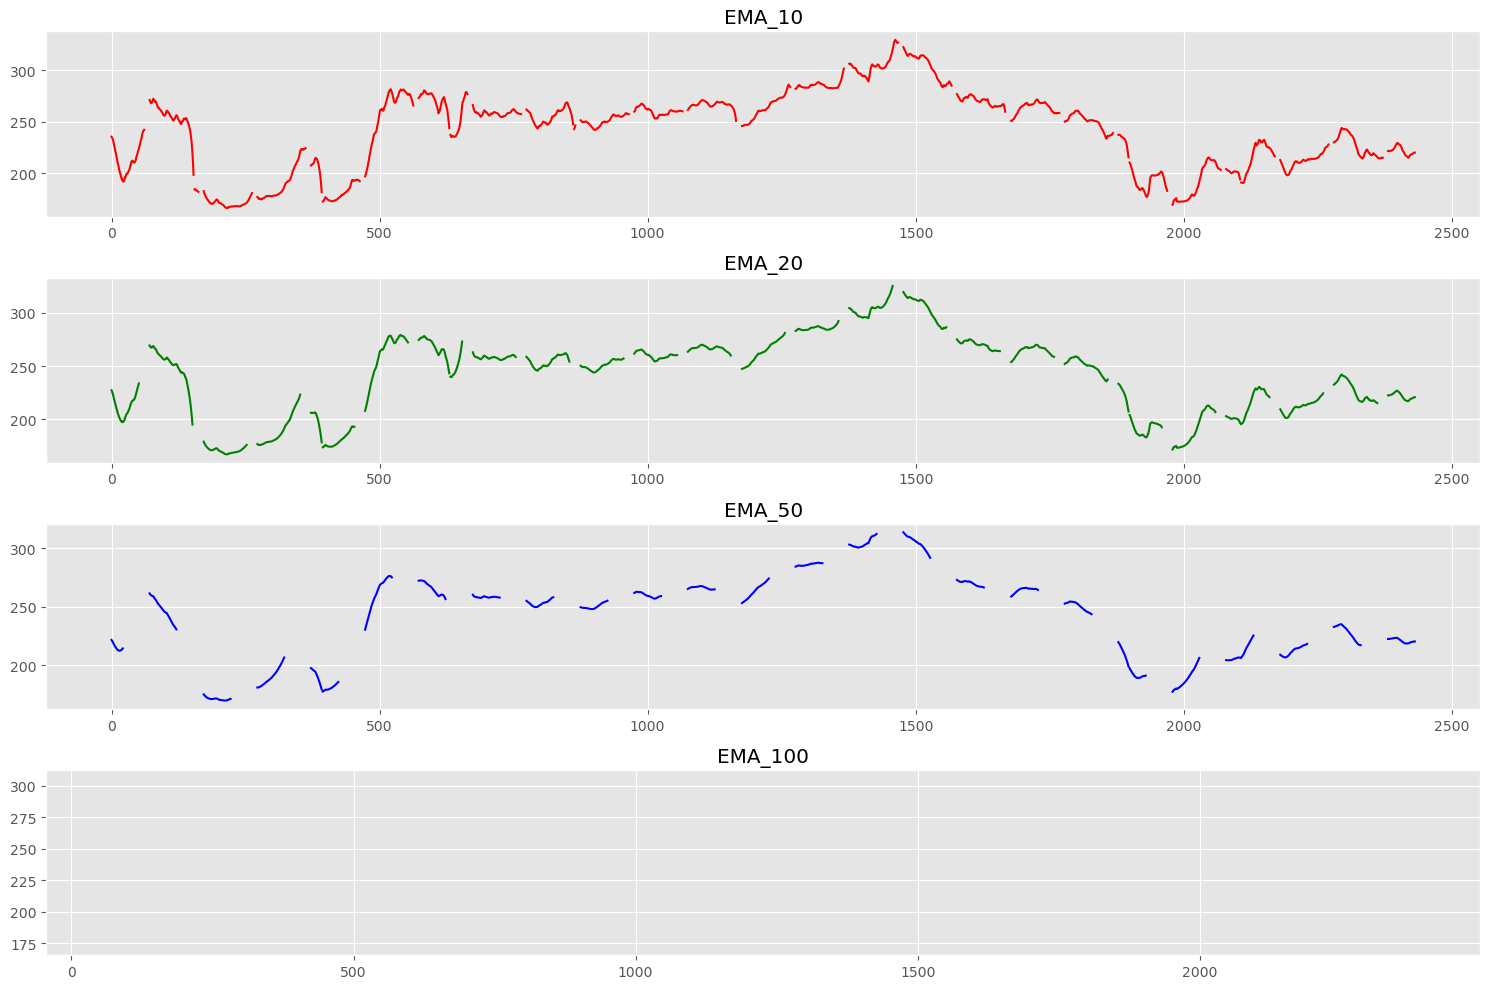

<Figure size 1500x1000 with 0 Axes>

In [23]:
EMD_columns = ['EMA_10', 'EMA_20', 'EMA_50', 'EMA_100']
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 10))
colors = ['red', 'green', 'blue', 'orange', 'black']

for i, ax in enumerate(axes.flatten()):
    data_other[EMD_columns[i]].plot(ax=ax, title=EMD_columns[i],color=colors[i])
plt.tight_layout()
plt.show()
plt.savefig(r'C:\Users\Amzad\Desktop\stock-price-prediction(main)\fig/EMD_10_EMD_20_EMD_50_EMD_100.png')

### EMA_10 ,EMA_20 ,EMA_50 shows the same pattern as amoung each other 
### so taking only one of them is(EMA_10) enough 

In [24]:
#corr of EMA_10 with close price 
data_ = stock_data.copy()
corr = data_other['EMA_10'].corr(data_copy['Close'])
print('Correlation between EMA_10 and Close: ', corr)

Correlation between EMA_10 and Close:  0.9900387741813209


## SMA,BBANDS_UPPER,BBANDS_MIDDLE,BBANDS_LOWER,STOCH_SLOWK,STOCH_SLOWD    

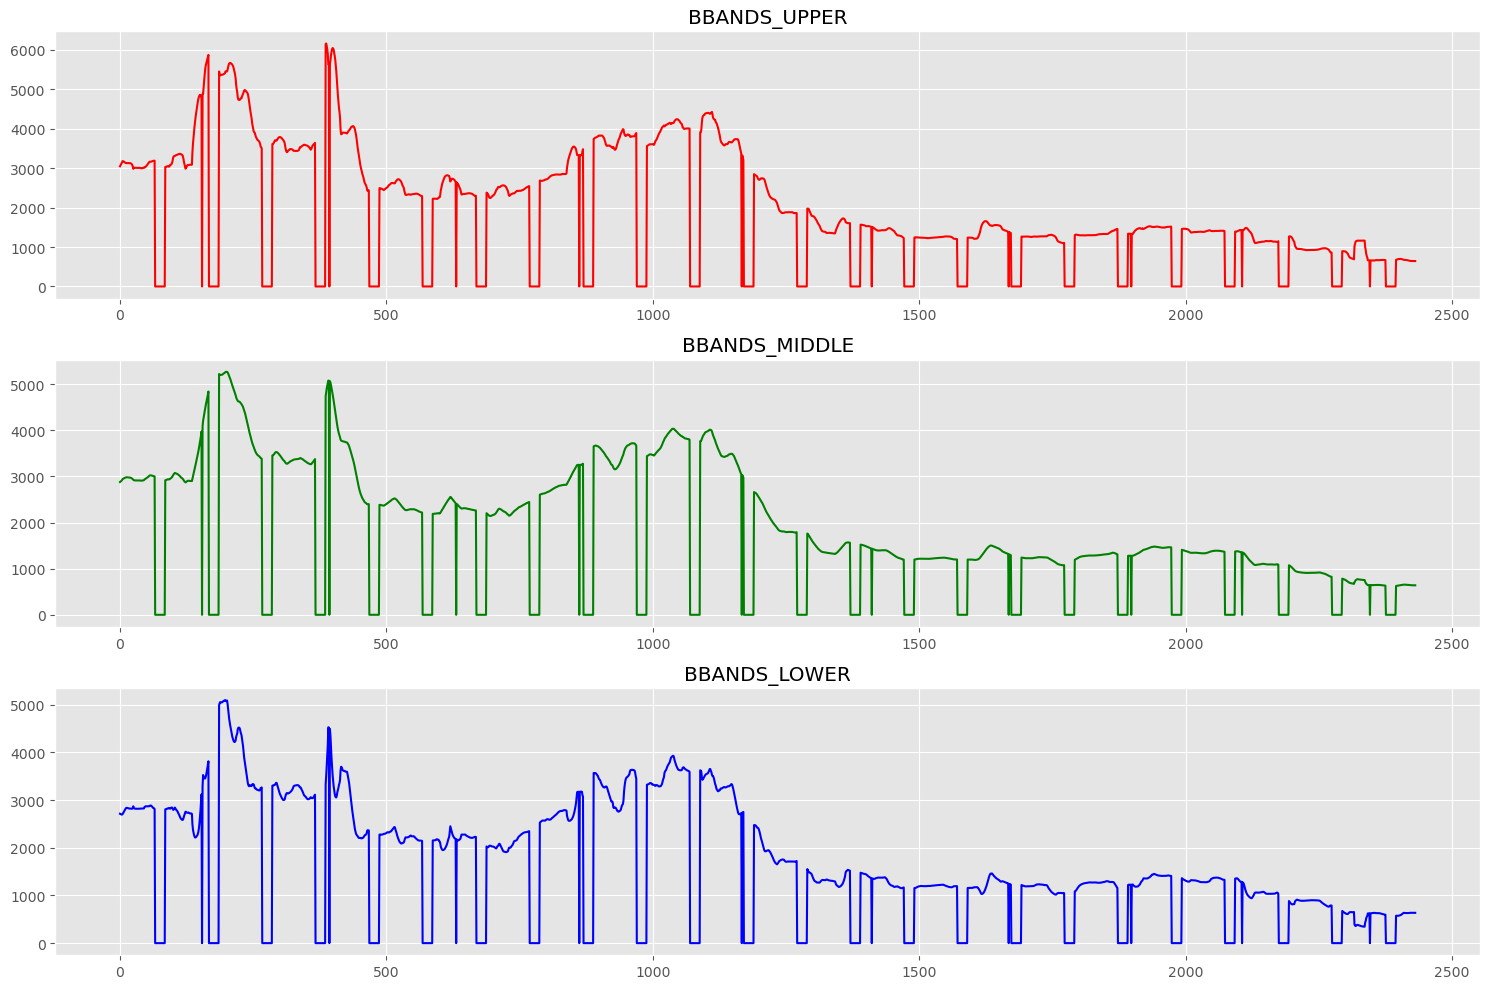

<Figure size 1500x1000 with 0 Axes>

In [25]:
#plot the BBANDS_UPPER ,BBANDS_MIDDLE ,BBANDS_LOWER column 
BBANDS_columns = ['BBANDS_UPPER', 'BBANDS_MIDDLE', 'BBANDS_LOWER']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
colors = ['red', 'green', 'blue', 'orange', 'black']

for i, ax in enumerate(axes.flatten()):
    data_other[BBANDS_columns[i]].plot(ax=ax, title=BBANDS_columns[i],color=colors[i])
plt.tight_layout()
plt.show()
plt.savefig(r'C:\Users\Amzad\Desktop\stock-price-prediction(main)\fig/BBANDS_UPPER_BMIDDLE_BLOWER.png')

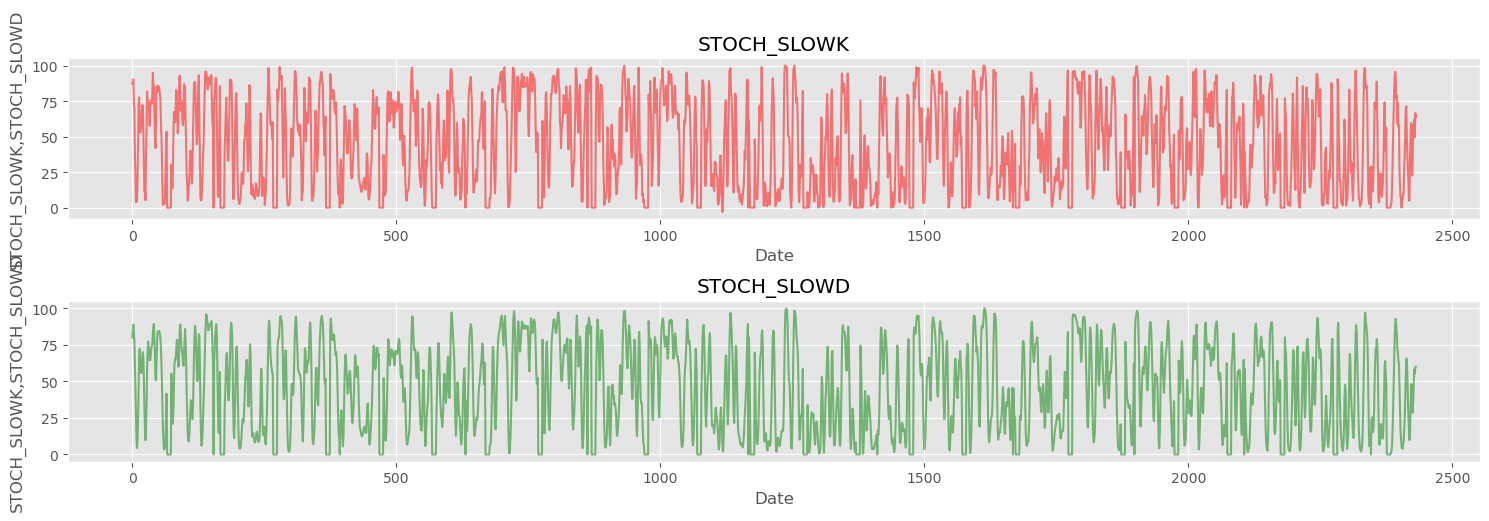

In [29]:
STOCH_columns = ['STOCH_SLOWK', 'STOCH_SLOWD']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 5))
colors = ['red', 'green', 'blue', 'orange', 'black']

for i, ax in enumerate(axes.flatten()):
    data_other[STOCH_columns[i]].plot(ax=ax, title=STOCH_columns[i],color=colors[i],xlabel='Date',ylabel='STOCH_SLOWK,STOCH_SLOWD'
                                      ,alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
#drop SMA, BBANDS_UPPER ,BBANDS_MIDDLE ,BBANDS_LOWER	STOCH_SLOWK,STOCH_SLOWD,SMA_10,EMA_10,RSI,	SMA_20,	EMA_20,	SMA_50,	EMA_50,	SMA_100,EMA_100 column 
data_other_v1 = data_other.drop(['SMA', 'BBANDS_UPPER', 'BBANDS_MIDDLE', 'BBANDS_LOWER', 'STOCH_SLOWK', 'STOCH_SLOWD', 'SMA_10', 'EMA_10', 'RSI', 'SMA_20', 'EMA_20', 'SMA_50', 'EMA_50', 'SMA_100', 'EMA_100'], axis=1)
data_other_v1.head()


In [ ]:
#info of data_other_v1
data_other_v1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   High                        2432 non-null   float64
 1   Low                         2432 non-null   float64
 2   Close                       2432 non-null   float64
 3   Volume                      2432 non-null   int64  
 4   Timestamp                   2432 non-null   int64  
 5   Max High                    2432 non-null   float64
 6   Min Low                     2432 non-null   float64
 7   Year_High                   2432 non-null   float64
 8   Year_Low                    2432 non-null   float64
 9   NAV                         2432 non-null   float64
 10  Current_Share_Price/NAV     2432 non-null   float64
 11  Pivot Point                 2432 non-null   float64
 12  R1                          2432 non-null   float64
 13  R2                          2432 

In [ ]:
#describe data_other_v1 
data_other_v1.describe()

High          Low        Close        Volume     Timestamp  \
count  2432.000000  2432.000000  2432.000000  2.432000e+03  2.432000e+03   
mean    243.294326   239.389926   241.163199  4.573589e+05  1.479558e+09   
std      41.139166    40.899707    41.019010  3.753409e+05  1.328827e+08   
min       0.000000     0.000000     0.000000  0.000000e+00  0.000000e+00   
25%     215.000000   211.900000   213.100000  2.216432e+05  1.404540e+09   
50%     253.950000   250.150000   251.750000  3.496650e+05  1.484568e+09   
75%     269.900000   266.300000   267.900000  5.782700e+05  1.563775e+09   
max     335.000000   328.200000   333.800000  4.318881e+06  1.648080e+09   

          Max High      Min Low    Year_High     Year_Low          NAV  ...  \
count  2432.000000  2432.000000  2432.000000  2432.000000  2432.000000  ...   
mean    276.799219   202.087788    35.728660   -38.982771    72.151213  ...   
std      36.474071    37.046306    25.191763    26.642670    16.030474  ...   
min       0.000000     0.000000     0.000000  -115.200000     0.000000  ...   
25%     251.900000   166.400000    17.300000   -57.125000    56.090000  ...   
50%     276.000000   190.100000    28.650000   -30.850000    72.200000  ...   
75%     293.000000   242.500000    48.800000   -18.075000    80.400000  ...   
max     335.000000   248.000000   122.800000     0.000000   108.710000  ...   

       Sector_Volume  Foreign_exchange_Buy  Foreign_exchange_rate_Sell  \
count   2.432000e+03           2432.000000                 2432.000000   
mean    1.336222e+07             70.247213                   70.259493   
std     1.236053e+07             28.043137                   28.049432   
min     1.103880e+06              0.000000                    0.000000   
25%     5.947502e+06             77.750000                   77.752500   
50%     9.537664e+06             79.600000                   79.620000   
75%     1.560760e+07             84.250000                   84.250000   
max     1.068547e+08            104.400000                  105.200000   

       5nn_close_price_avg    Year High        Corr1        Corr2  \
count          2432.000000  2432.000000  2432.000000  2432.000000   
mean            118.827252    35.794819    59.980798   182.340132   
std             122.958692    25.118930    27.587193    32.848826   
min               0.000000     1.200000     0.000000     0.000000   
25%               0.000000    17.300000    37.175000   167.700000   
50%               0.000000    28.650000    56.000000   181.000000   
75%             250.590017    48.800000    75.700000   198.825000   
max             327.007692   122.800000   142.200000   282.600000   

              Beta  Gold Rate BD  Reserve in USD  
count  2432.000000   2432.000000     1944.000000  
mean      0.755919   4528.592722    29496.327402  
std       0.043435    828.805933     4250.785568  
min       0.000000   3450.000000    17562.890000  
25%       0.758414   3862.500000    27446.570000  
50%       0.758414   4200.000000    31328.950000  
75%       0.758414   4942.500000    32218.320000  
max       0.758414   6485.000000    44280.050000  

[8 rows x 39 columns]

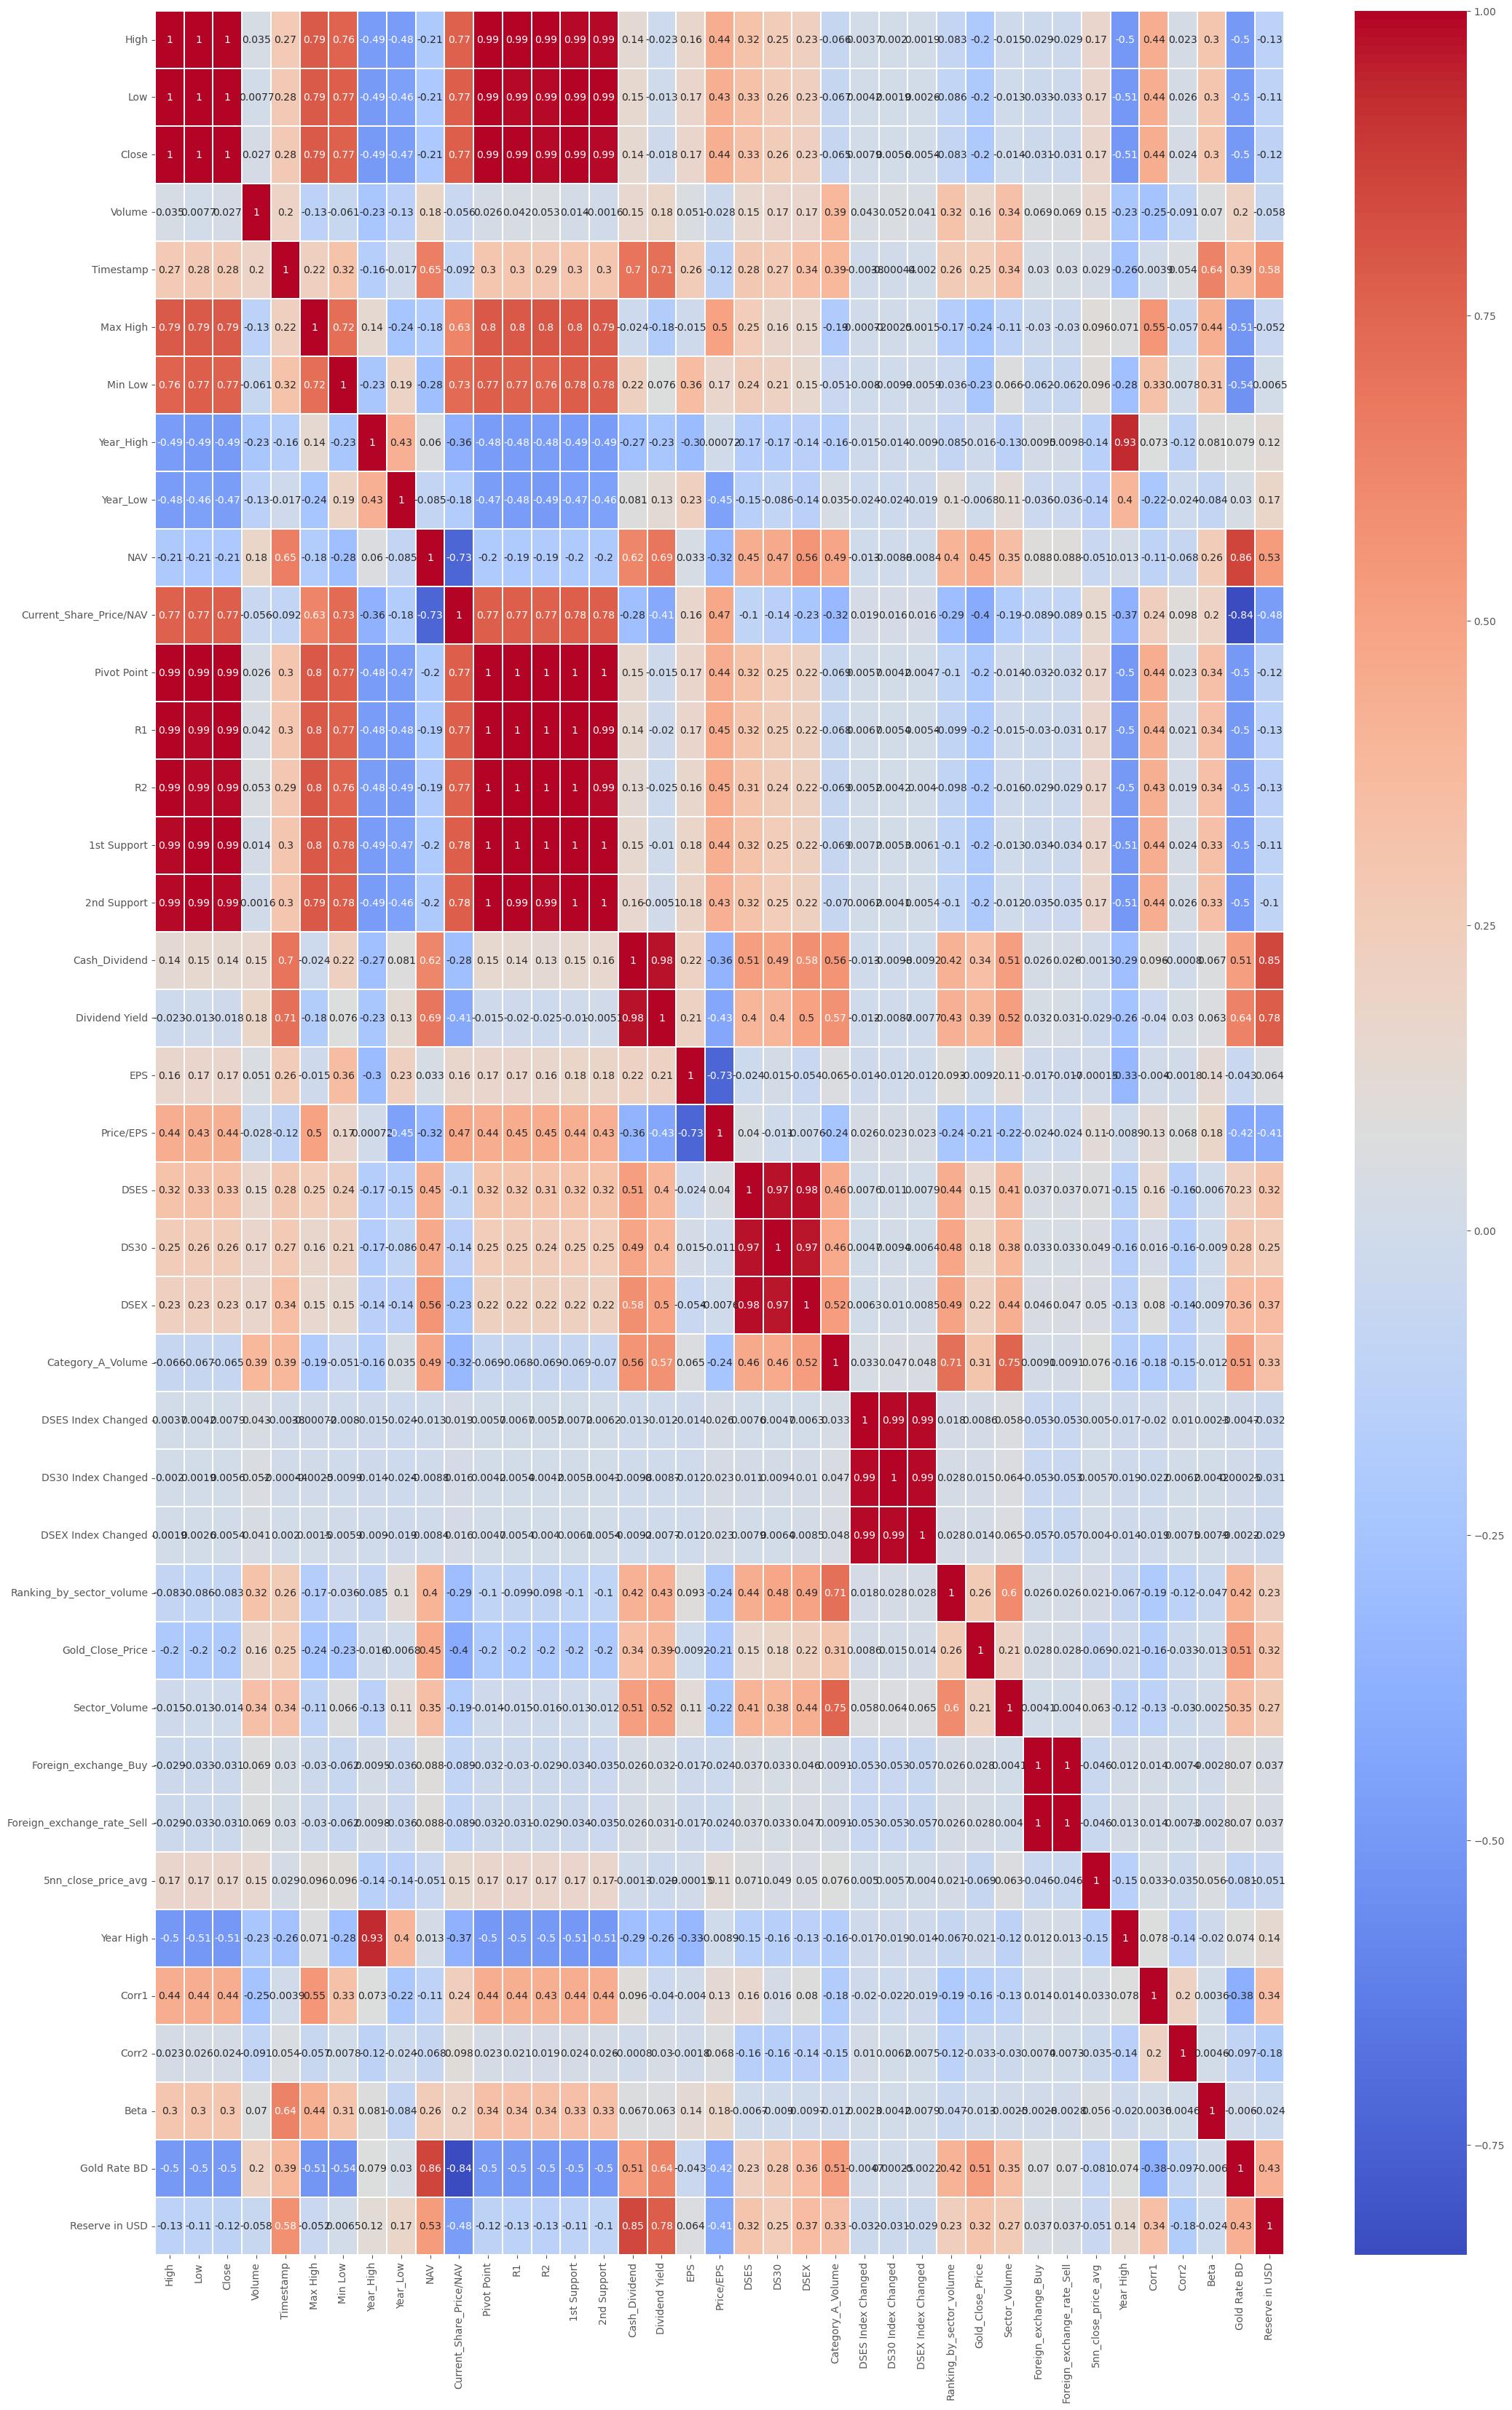

In [ ]:
#corr matrix of data_other_v1
corr = data_other_v1.corr()
corr.style.background_gradient(cmap='coolwarm')
#plot the corr matrix of data_other_v1
plt.figure(figsize=(25, 40))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.2)
plt.show()


## Main dataset 

In [2]:
df=pd.read_csv(r'C:\Users\Amzad\Desktop\sqph_stock_prediction\notebook\data\Sqph_dataset.csv')

In [3]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Year_High',
       'Year_Low', 'Current_Share_Price/NAV', 'Pivot Point', 'R1', 'R2',
       '1st Support', '2nd Support', 'Cash_Dividend', 'Dividend Yield', 'EPS',
       'Price/EPS', 'DSES', 'DS30', 'DSEX', 'Category_A_Volume',
       'DSES Index Changed', 'DS30 Index Changed', 'DSEX Index Changed',
       'Ranking_by_sector_volume', 'Gold_Close_Price', 'Sector_Volume',
       'Foreign_exchange_Buy', 'Foreign_exchange_rate_Sell',
       '5nn_close_price_avg', 'Year High', 'Corr1', 'Corr2', 'Beta',
       'Gold Rate BD', 'Reserve in USD', 'SMA', 'SMA_10', 'SMA_20', 'SMA_50',
       'EMA_10', 'RSI', 'EMA_20', 'EMA_50', 'Breakout', 'Consolidate',
       'BBANDS_UPPER', 'BBANDS_MIDDLE', 'BBANDS_LOWER', 'STOCH_SLOWK',
       'STOCH_SLOWD', 'CDLSHORTLINE', 'CDLRICKSHAWMAN', 'CDLSPINNINGTOP',
       'CDLINVERTEDHAMMER', 'CDLLONGLEGGEDDOJI', 'CDLLONGLINE', 'CDLMARUBOZU',
       'CDLMATCHINGLOW', 'CDLGRAVESTONEDOJI', 'CDLHARAMI', 'CDLHI

In [4]:
df.shape

(2432, 68)

In [5]:
#date column to datetime 
df['Date'] = pd.to_datetime(df['Date'])


##  'Year_High','Year_Low'

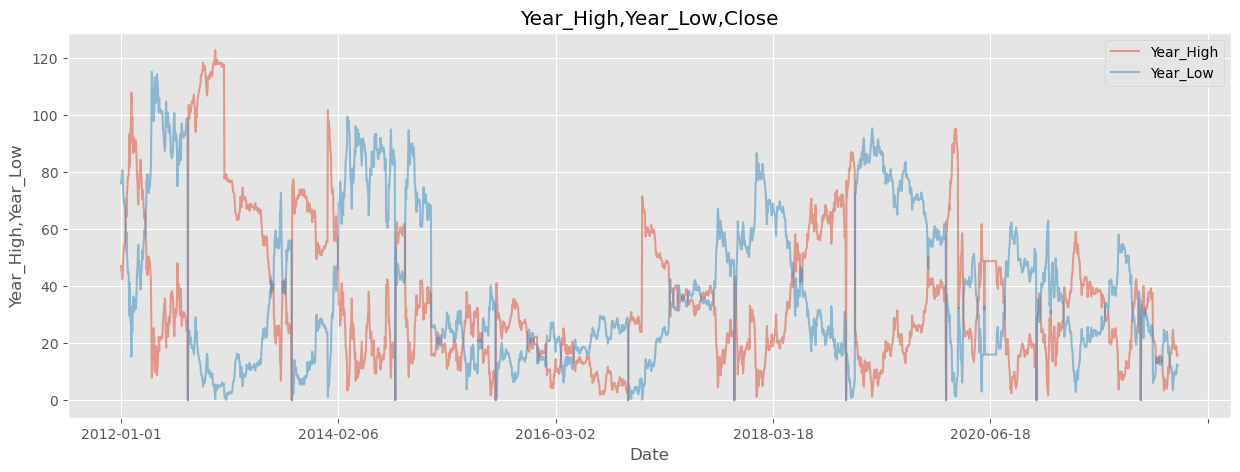

<Figure size 1500x1000 with 0 Axes>

In [6]:
#plot the 'Year_High','Year_Low', in a sub plot with close price
df.plot(x='Date', y=['Year_High', 'Year_Low',], figsize=(15, 5), xlabel='Date', ylabel='Year_High,Year_Low', title='Year_High,Year_Low,Close',kind='line',alpha=0.5)
plt.show()
plt.savefig(r'C:\Users\Amzad\Desktop\stock-price-prediction(main)\fig/Year_High_Year_Low.png')

## Is there any effect reseve in closing price ?

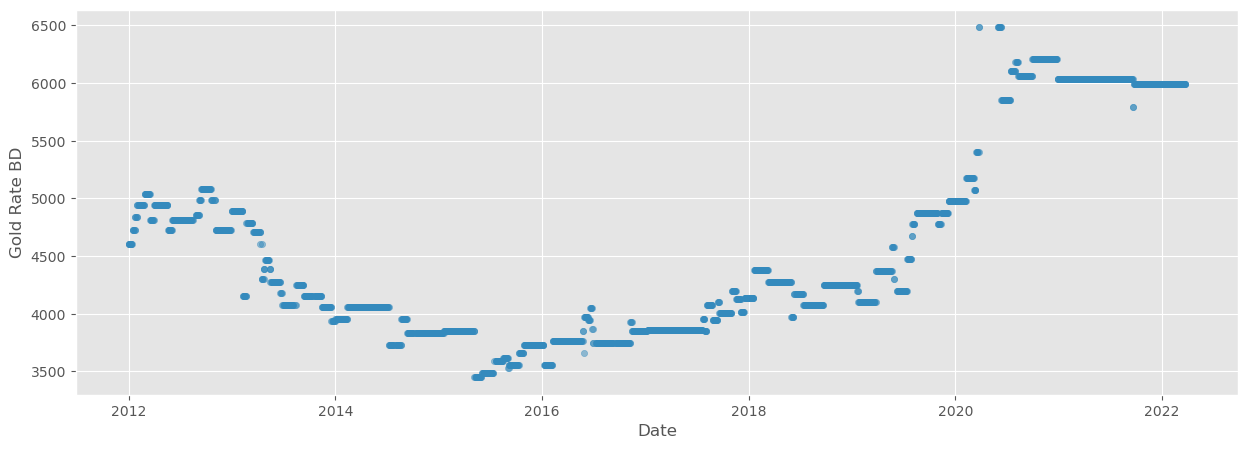

<Figure size 1500x1000 with 0 Axes>

In [33]:
#plot 'Gold Rate BD' column scatter plot with respect to "Date" 
df.plot(x='Date', y=['Gold Rate BD'], figsize=(15, 5),xlabel='Date',ylabel='Gold Rate BD',alpha=0.5,kind='scatter')
plt.show()
plt.savefig(r'C:\Users\Amzad\Desktop\stock-price-prediction(main)\fig/Gold Rate BD.png')



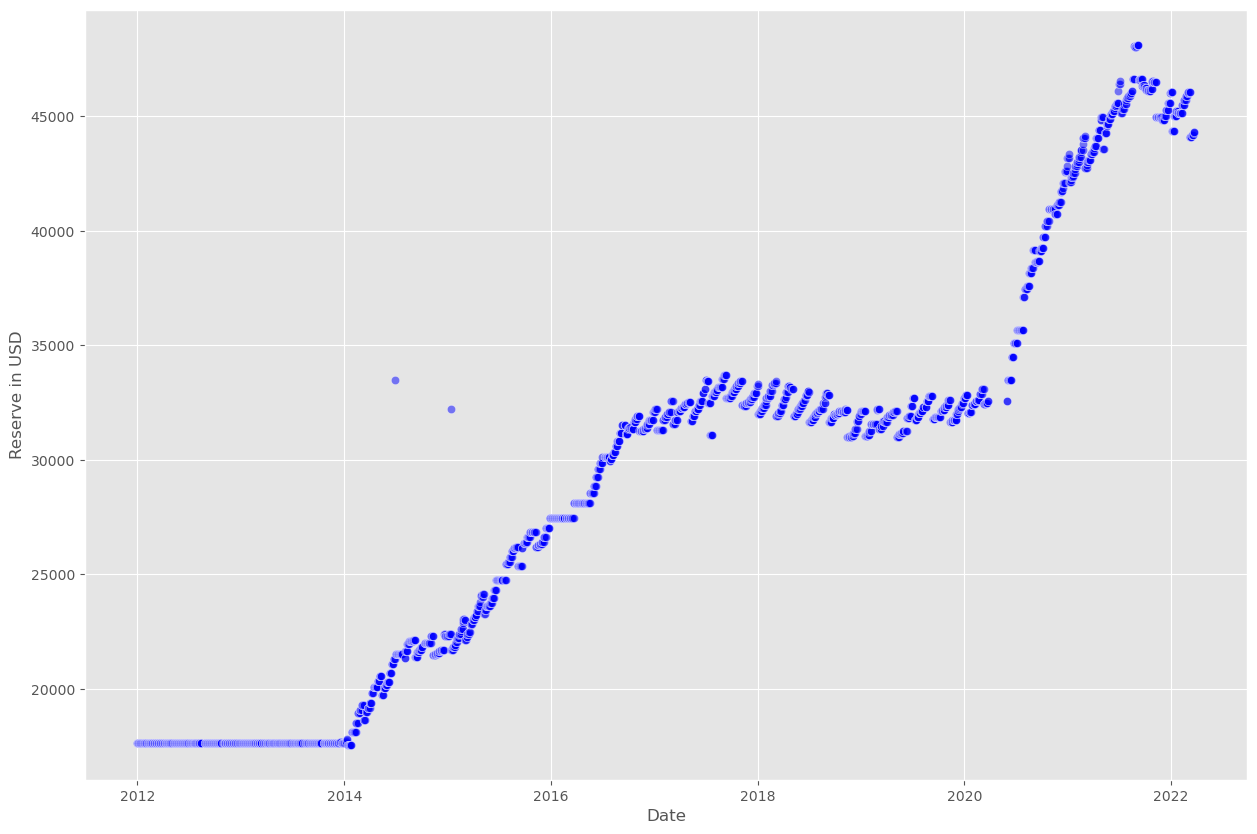

In [7]:
#plot 'Gold Rate BD', 'Reserve in USD' seaborn scatter plot with respect to "Date"
# sns.scatterplot(x='Date', y='Gold Rate BD', data=df, color='red', alpha=0.5)
sns.scatterplot(x='Date', y='Reserve in USD', data=df, color='blue', alpha=0.5)

plt.show()


## positive corrlation between reserve and gold price after 2018


## there is no corr between stock price and bd reserve 

<AxesSubplot:xlabel='Date', ylabel='Ranking_by_sector_volume'>

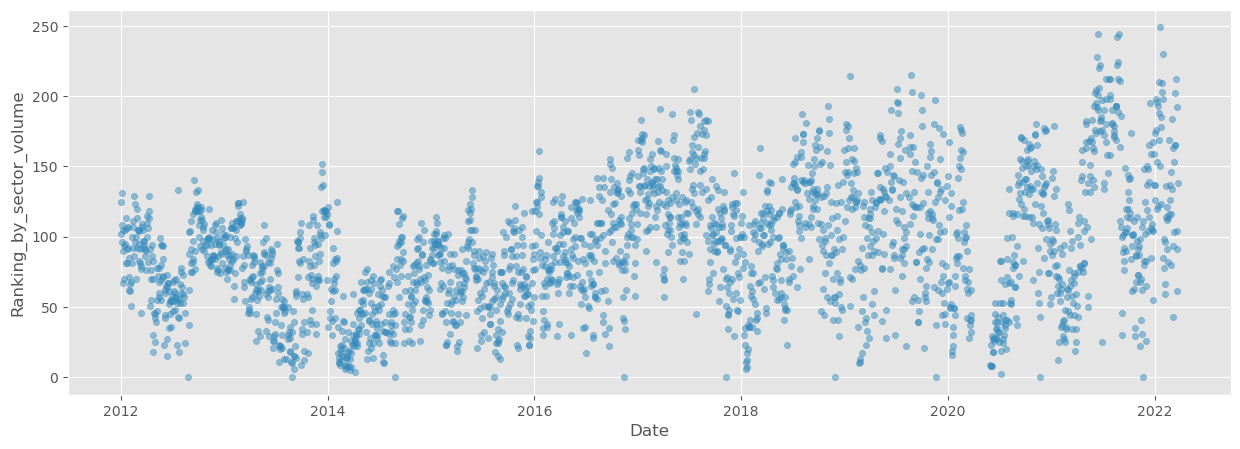

In [39]:
# 'Ranking_by_sector_volume' scatter plot with date 
df.plot(x='Date', y=['Ranking_by_sector_volume'], figsize=(15, 5),xlabel='Date',ylabel='Ranking_by_sector_volume',alpha=0.5,kind='scatter')




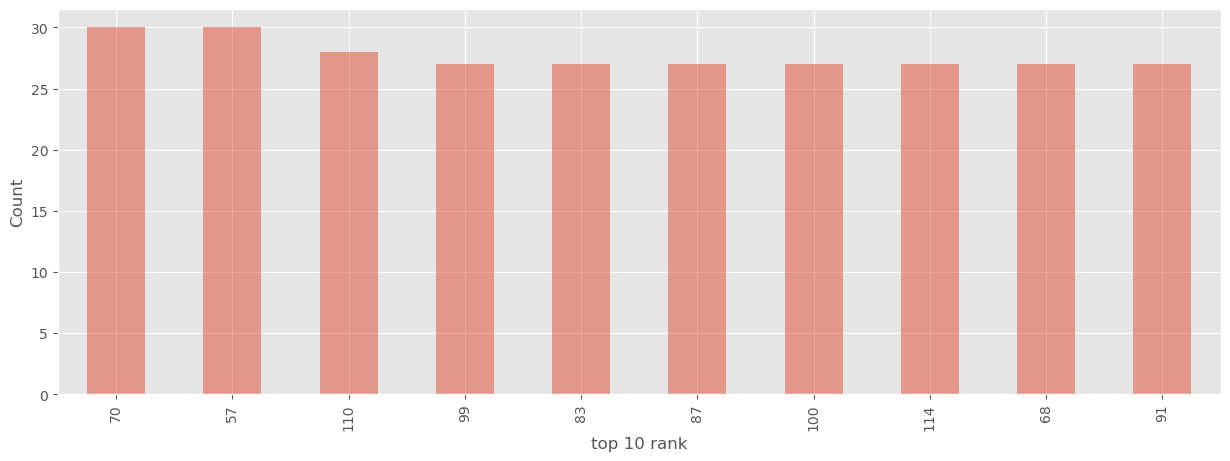

249
0


In [24]:
#value count of 'Ranking_by_sector_volume' column 
df['Ranking_by_sector_volume'].value_counts().head(10).plot(kind='bar', figsize=(15, 5),xlabel='top 10 rank',ylabel='Count',alpha=0.5)
plt.show()
print(df['Ranking_by_sector_volume'].max())
print(df['Ranking_by_sector_volume'].min())

<AxesSubplot:xlabel='Date', ylabel='Gold_Close_Price'>

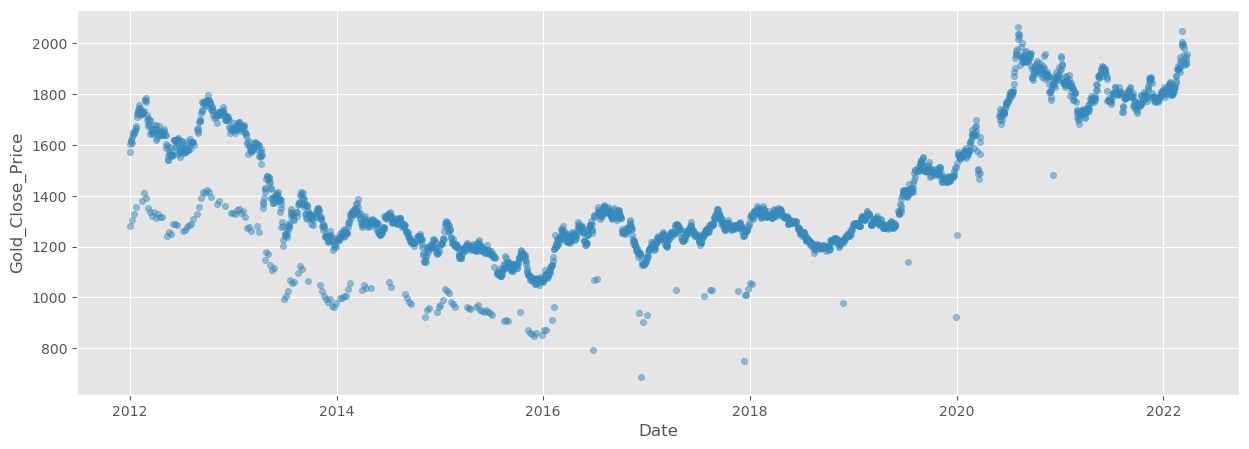

In [50]:
#'Gold_Close_Price' plor 
df.plot(x='Date', y=['Gold_Close_Price'], figsize=(15, 5),xlabel='Date',ylabel='Gold_Close_Price',alpha=0.5,kind='scatter')

## do gold rete bd and gold close price have influence ?

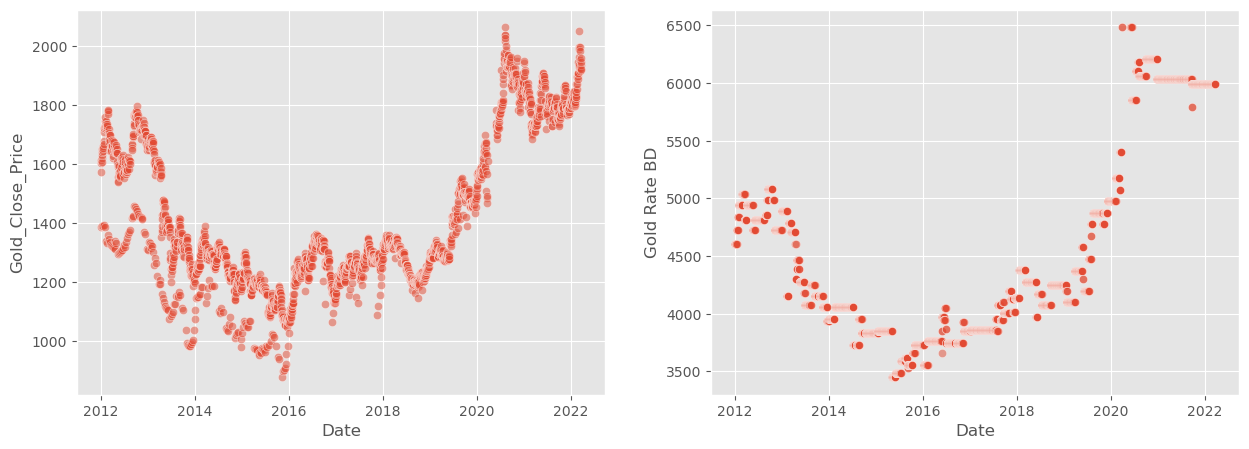

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Date', y='Gold_Close_Price', data=df, alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Gold_Close_Price')
plt.subplot(1, 2, 2)
sns.scatterplot(x='Date', y='Gold Rate BD', data=df, alpha=0.5)
plt.show()

## gloabal gold price and local gold price are highly correlated 

## 'R1', 'R2'

## is there any relationsionship between R1 and R2 ?

<AxesSubplot:xlabel='Date', ylabel='R1'>

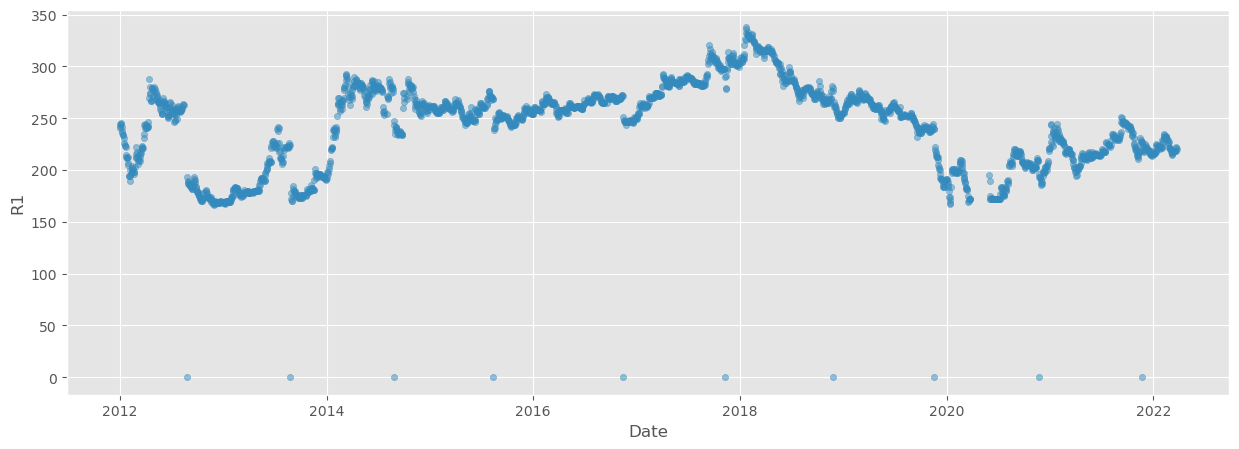

In [15]:
#'R1', 'R2' value count 
df['R1'].value_counts() 
df.plot(x='Date', y=['R1'], figsize=(15, 5),xlabel='Date',ylabel='R1',alpha=0.5,kind='scatter')


<AxesSubplot:xlabel='Date', ylabel='R1,R2'>

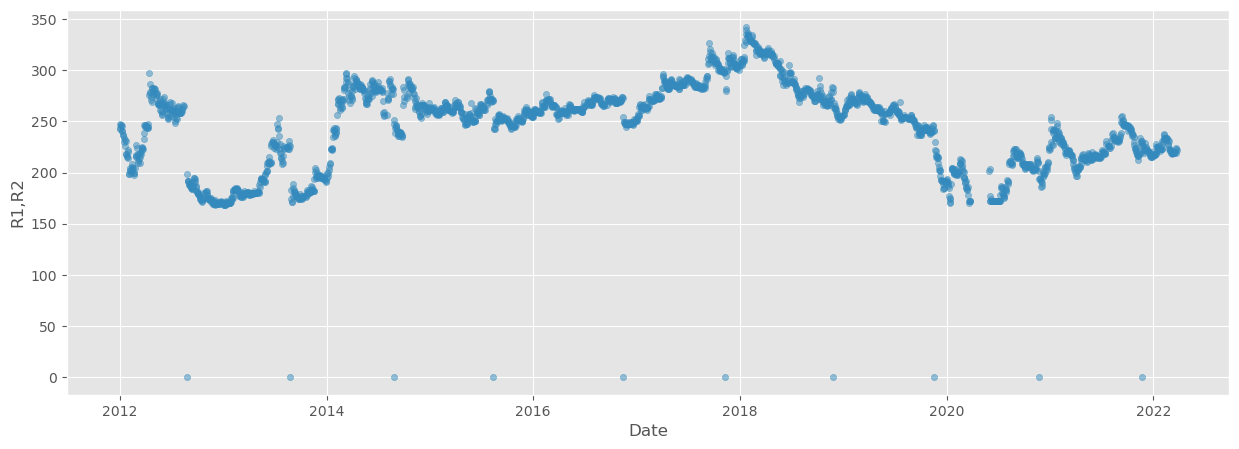

In [14]:
df['R2'].value_counts()
df.plot(x='Date', y=['R2'], figsize=(15, 5),xlabel='Date',ylabel='R2',alpha=0.5,kind='scatter')


## R1 and R2  shows very similler pattern 


# 'Corr1', 'Corr2'

<AxesSubplot:xlabel='Date', ylabel='Corr2'>

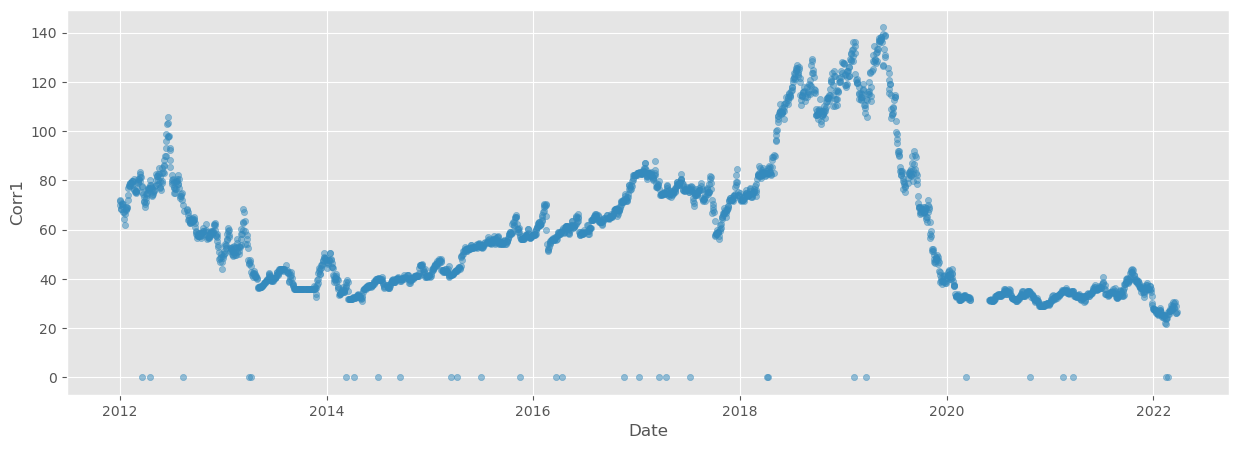

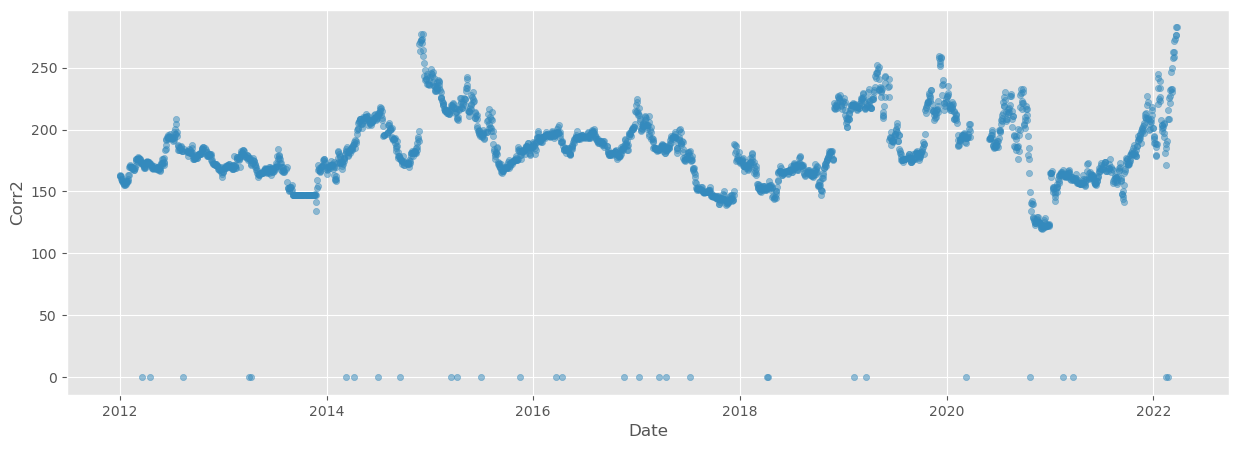

In [26]:
# Corr1', 'Corr2'
df['Date'] = pd.to_datetime(df['Date'])
df.plot(x='Date', y=['Corr1'], figsize=(15, 5),xlabel='Date',ylabel='Corr1',alpha=0.5,kind='scatter')
df.plot(x='Date', y=['Corr2'], figsize=(15, 5),xlabel='Date',ylabel='Corr2',alpha=0.5,kind='scatter')

